## Final Project Submission

Please fill out:
* Student name: **Joy Chepchumba Kipkemboi**
* Student pace: self paced / part time / full time : **Part-time**
* Scheduled project review date/time:  **26th/03/2023**
* Instructor name: **Samuel Jane**
* Blog post URL: **N/A**


#  INTRODUCTION

In this  lab , we shall be carrying out the phase two project where we shall be analysing the Kings Count House Sales Datasets.

# Business Understanding

In this dataset , our stakeholders could be a company that deals with selling houses (<font color=green >**Real Estate Agency**</font>).
When selling houses a real estate agent would aim at selling the house at the most reasonable price that would bring profits to their company and even increase their commision.A real estate agency would be interested to know what can they do to make sure that the houses they sell are sold at a good price, for example if houses that are in  highly secure places are the ones with the most reasonable price then they would aim at selling more houses like such so that they can get good profits.In this , project, we carry out analysis to find out the faetures that real estate agents should invest in when looking for houses to sell or even building their own houses for sale and a range of price that would be great for sale.

# Data Understanding

In this lab we shall be using the <font color=green> **kc_house_data.csv**</font> which is basically the Kings County House Sales dataset.This data can be found in the data folder in this repository and was sourced from Canvas.Lets learn more about this data.

### 1) Data Reading 

In [710]:
#Getting the relevant import 
#We shall add some on the way if they are not already here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.stats.api as sms
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [711]:
##Lets start by reading our dataset
df=pd.read_csv(r"C:\Users\Hp\dsc-phase-2-project\data\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [712]:
##Lets get to inspect this dataset first
df.shape

(21597, 21)

We can see that our dataset has 21597 rows and 21 columns,according to me, this amount of data is just fine, and can be used to create a good model.

In [713]:
##Lets get to see more about this dataset , we can tell the data types of each cell
## We can also get to see if our dataset has null values by checking the total number of rows that are not null in our column verses the total number of crows in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above analysis , we can already see that some of our columns like *Waterfront , View and yr_renovated* have some missing values, we will look more into this later , for now you can atleast have the idea of the data types of each column.

In [714]:
# lets describe the  columns in this dataset
##This does not include the non-numeric columns but it gets to tell us the count,mean,std,25th percentile,75thpercentile,and 50thpercntile(Median) ,minimum and maximum value.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Lets check the data types of each variable

In [715]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Lets check the distribution of each variable, we shall do this by plotting a histogram.

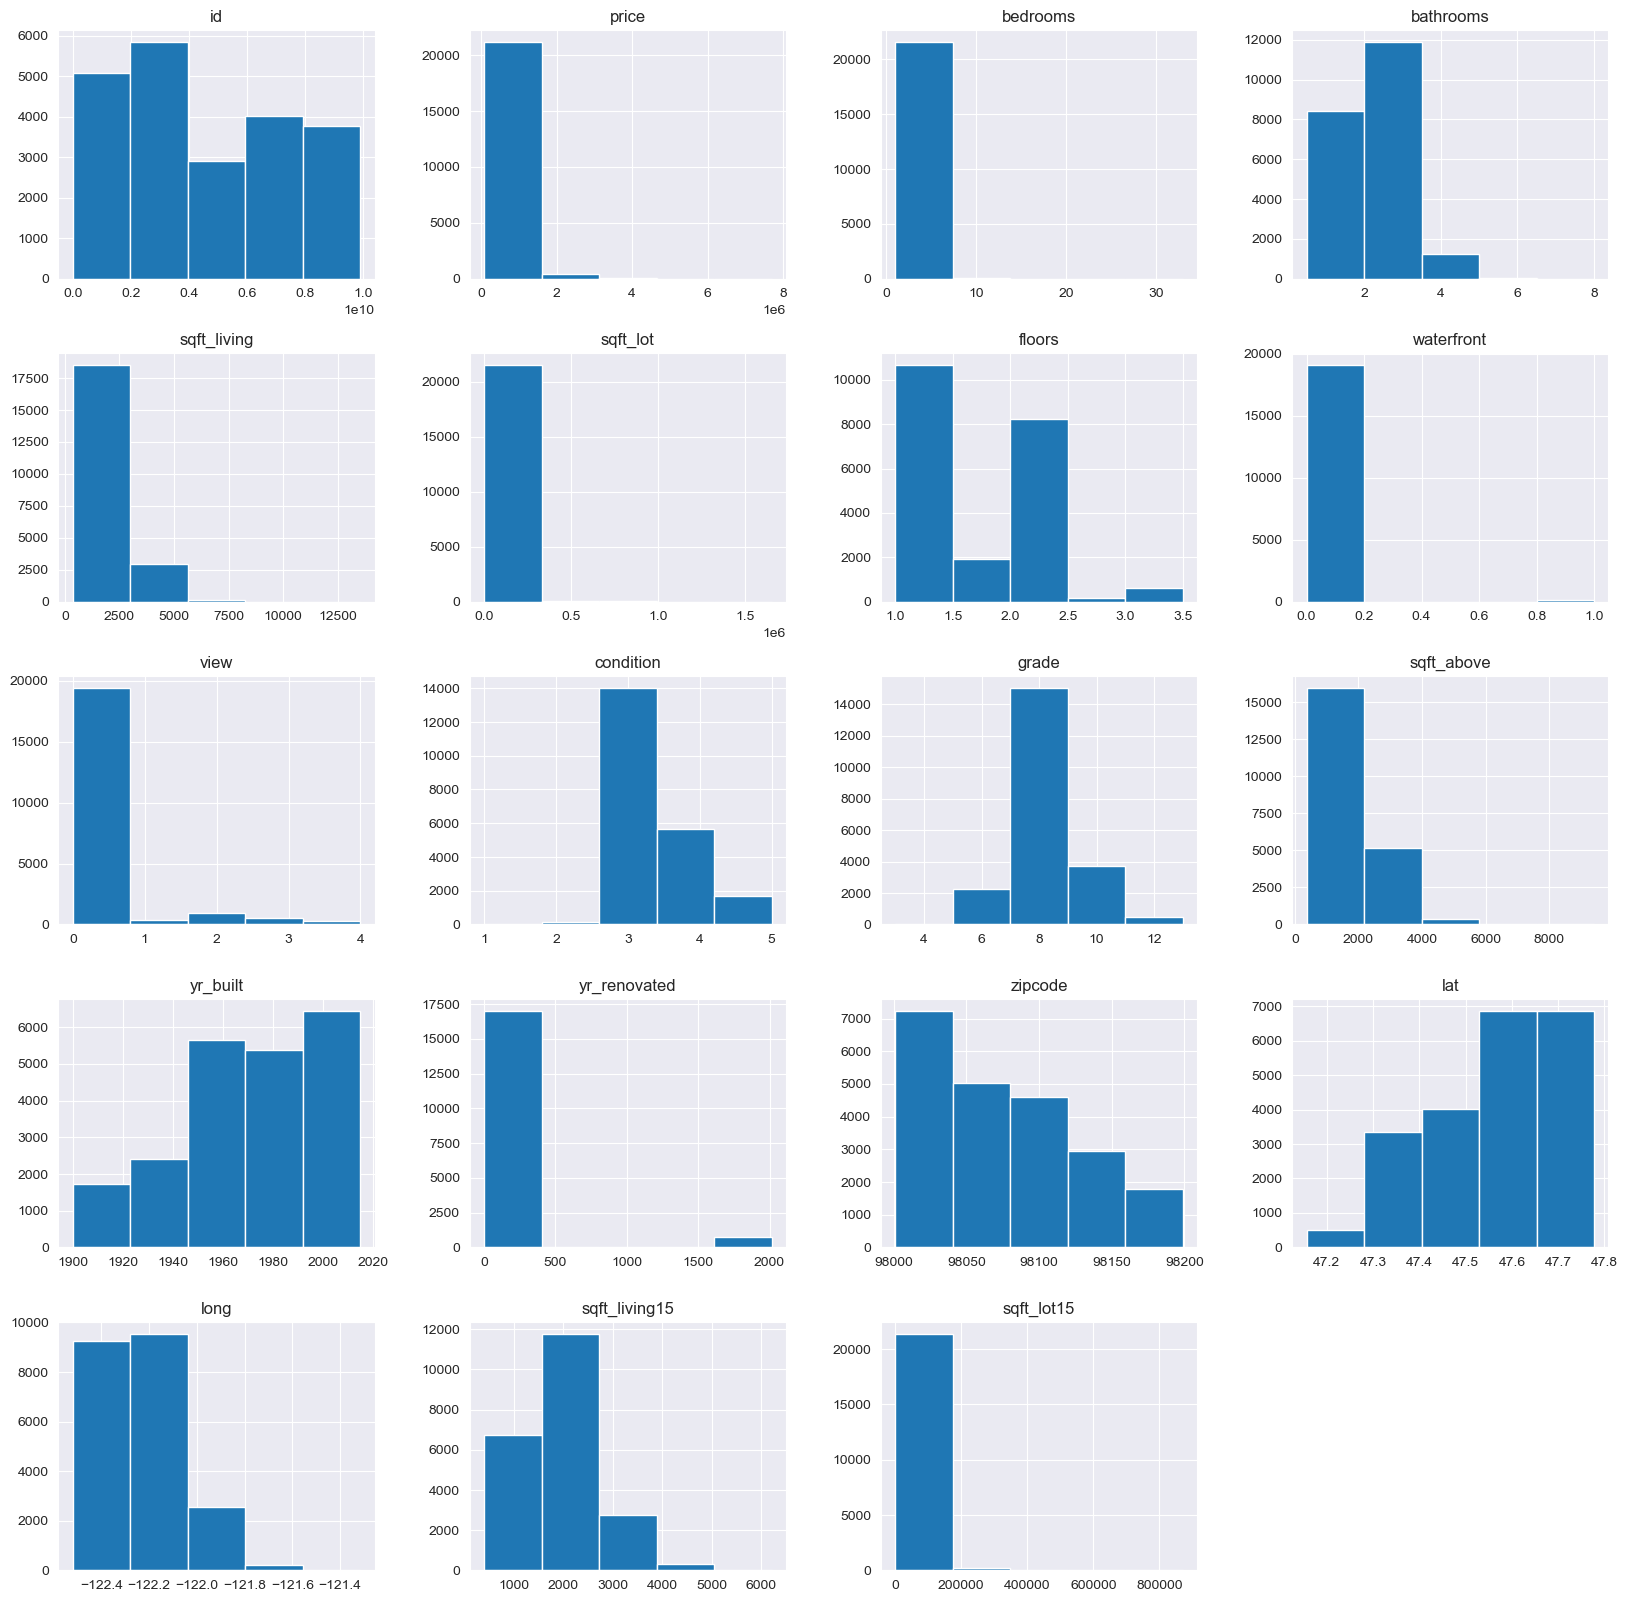

In [716]:
df.hist(bins=5,figsize=[20,20]);

In [717]:
corr=df.corr(method='pearson')
corr

C:\Users\Hp\AppData\Local\Temp\ipykernel_14920\4107286709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method='pearson')


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


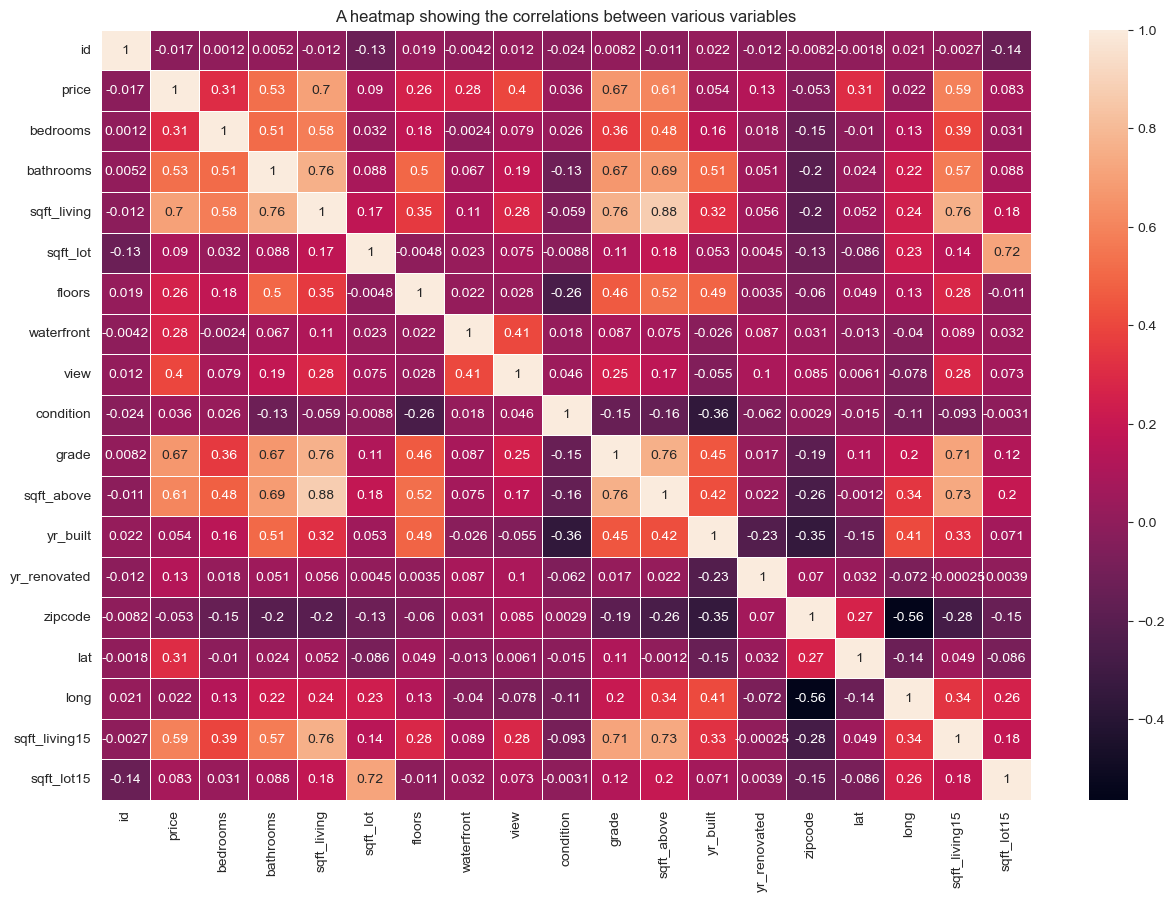

In [718]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,linewidth=.5,annot=True)
plt.title('A heatmap showing the correlations between various variables')
plt.show();

From the histogram above, you can see that not all of our data is normally distributed, but most are normally distributed.

From my understanding of the above data:<br>
1)Our target is the **Price**.This is because , this column depends on the other columns.<br>
2)The predictors available to us include: 
*bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_basement',sqft_lot15,sqft_living15,sqft_above*<br>
3)We can also see that the feature that is most correlated with our target variable is **sqft_living**.<br>

# Data Preperation

### 1) Detecting and dealing with missing values, extraneous values and outliers

Here we will now check for missing valueas and deal with them in the most relevant way possible

In [719]:
##Checkking for null values
## This will show us each column , if they have missing values it will give us the number of missing values else it shows a zero for a column without missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Lets check and see the values in the column waterfront which has missing values so that we can understand it more and use the most appropriate way to handle its missing values

In [720]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

So according to me, this column has categorical value which is one and zero.I assume that where the value is zero it means that there is no waterfront and one means that there is a waterfront hence , if we have a missing value , then it should be a zero since it is unknown hence we can say that the  property does not have a water front</br>
We previously learnt that if the data is categorical,it is advisable to replace the null values with the mode rather than the mean and median, lets see what the mode value is .

In [721]:
val=df.waterfront.mode()
val

0    0.0
Name: waterfront, dtype: float64

We can see that our mode is **0.0** *According to my assumption where stands for the houses with no waterfront, I think we should replace the missing values with the mode* .

In [722]:
df['waterfront'].fillna(value=0.0,inplace=True)


Now lets see if the waterfront column still has null values.

In [723]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Since our waterfront has no missing valies, lets go ahead and do the same for the views column

According to me , this varaible is a categorical variable hence we shall look for the values in the category of views

In [724]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Let us now find the mode of the views and use it to replace the missing values.

In [725]:
val2=df.view.mode()
val2

0    0.0
Name: view, dtype: float64

In [726]:
df['view'].fillna(value=0.0,inplace=True)
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [727]:
#df.yr_renovated.fillna(value=df.yr_renovated.median(),inplace=True)
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have cleaned the missing values in the columns *view* and *waterfront* , lets go ahead and clean the missing values in **yr_renovated**.Since this column is not categorical ,we shall not look at the value_counts. 

I do not want to drop this column so , I will replace the missing values with its median value since it isa continous variable.

In [728]:
df.yr_renovated.fillna(0.0,inplace=True)

Now lets check if we still have missing values in our dataset

In [729]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can see that we no longer have missing values in our dataset, this is good but in order to be cautious , lets go ahead and check for extraneous values in our dataset.This are missing values that are sometimes hidden in our dataset

In [730]:
for col in df.columns:
    print(col,'/n',df[col].value_counts(normalize=True).head(),'/n','/n')

id /n 795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
Name: id, dtype: float64 /n /n
date /n 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 /n /n
price /n 450000    0.007964
350000    0.007964
550000    0.007362
500000    0.007038
425000    0.006945
Name: price, dtype: float64 /n /n
bedrooms /n 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 /n /n
bathrooms /n 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 /n /n
sqft_living /n 1300    0.006390
1400    0.006251
1440    0.006158
1800    0.005973
1660    0.005973
Name: sqft_living, dtype: float64 /n /n
sqft_lot /n 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
4800    0.005510
Name: sqft_lot, dtype: float64 /n /n
floors /n 1.0    0.494189
2.0 

We can see that we have a hidden missing value in the column, *sqft_basement* the value is **?** this could easily be ignored if one isn't keen enough, lets go ahead and replace this value with the median. which is what we use to replace continous missing values.

In [731]:
#df.sqft_basement.median()

In [732]:
df.sqft_basement.replace({'?':0.0},regex=False,inplace=True)

In [733]:
df.sqft_basement.value_counts()

0       12826
0.0       454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 304, dtype: int64

In [734]:
df.sqft_basement=df.sqft_basement.astype(float)

I have changed the value into a 0.0 but you can see that I have replaced it as string, this is because the datatype indicated when we used the df.info showed that the datatype was a string, we will deal with this as we continue.

While we are at it, I think its also good to check out for some outliers.Outliers can cause a great deal in our analysis so one should be cautious and try to avoid the outliers, boxplots are a good way of visualising outliers below is a boxplot for each column.

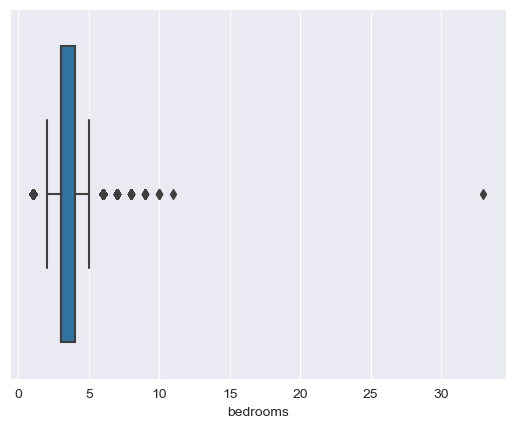

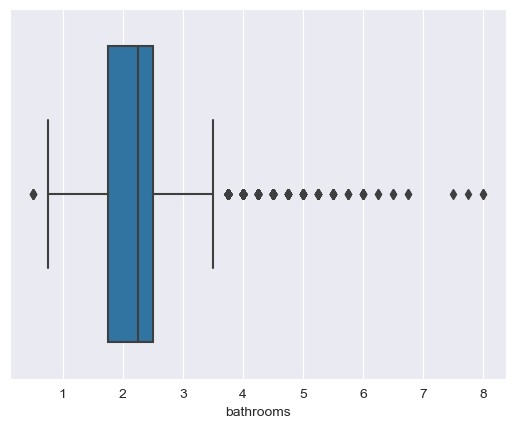

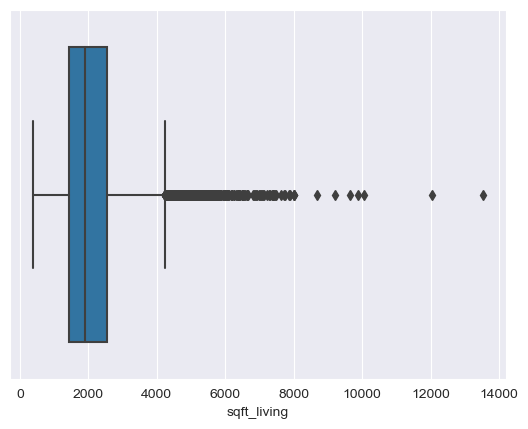

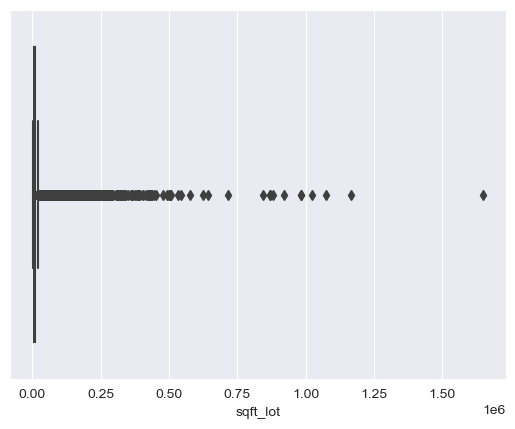

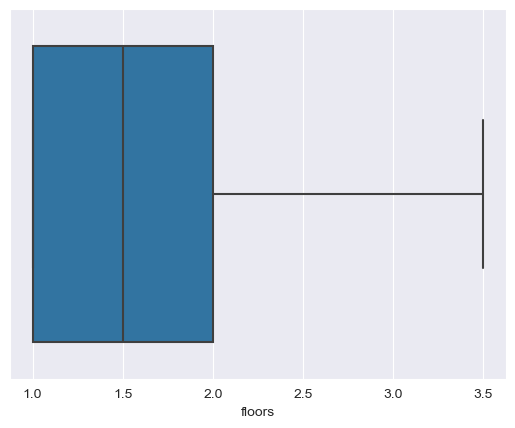

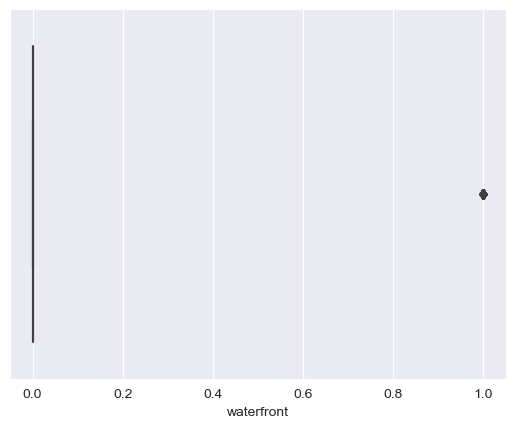

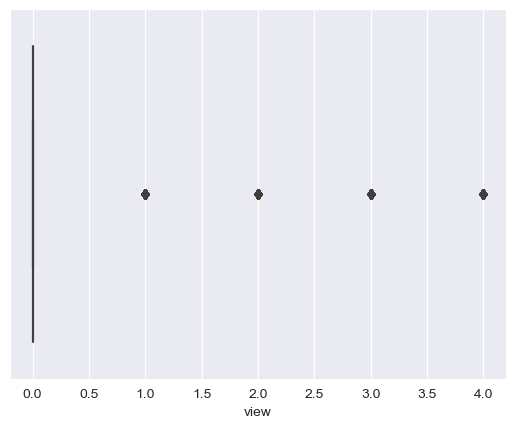

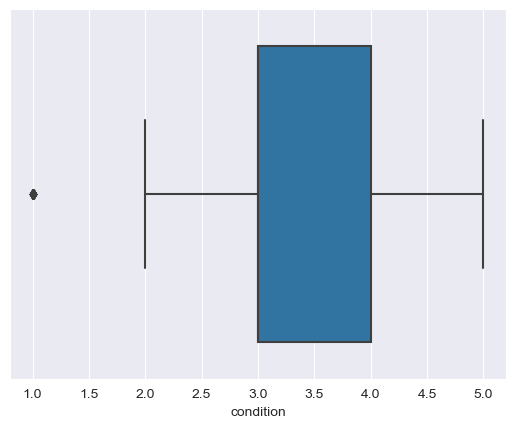

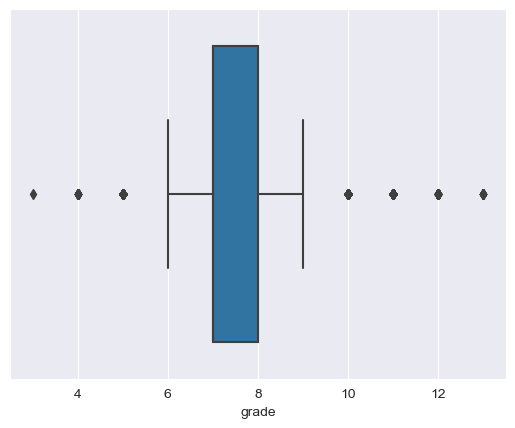

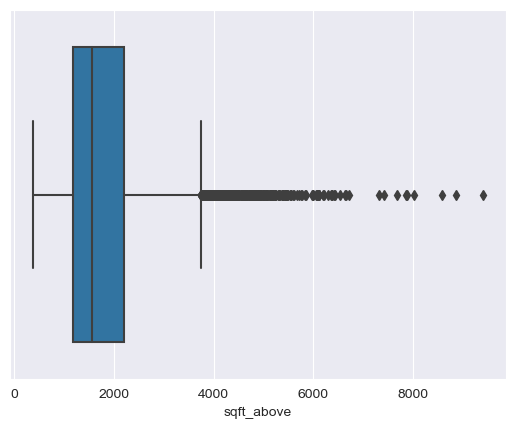

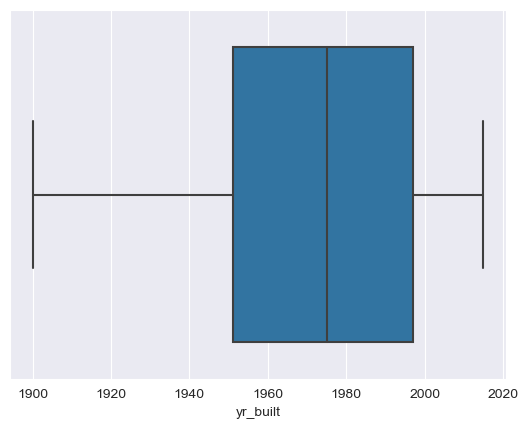

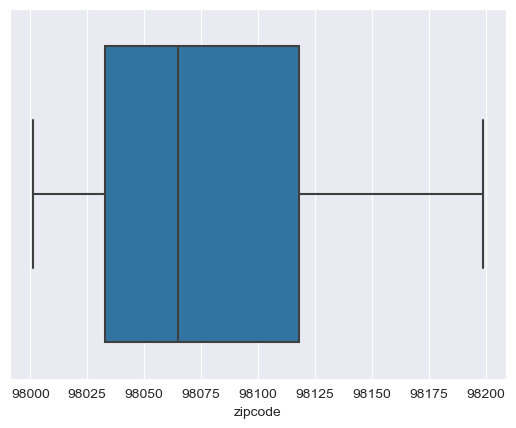

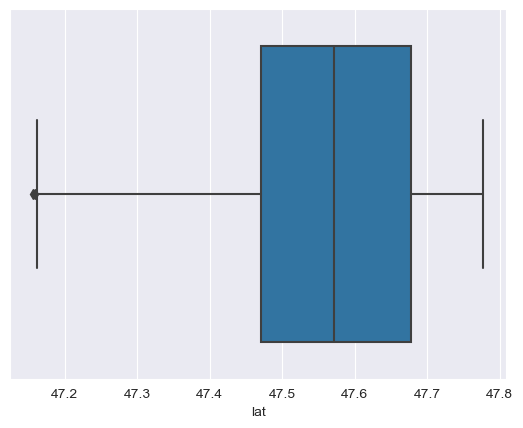

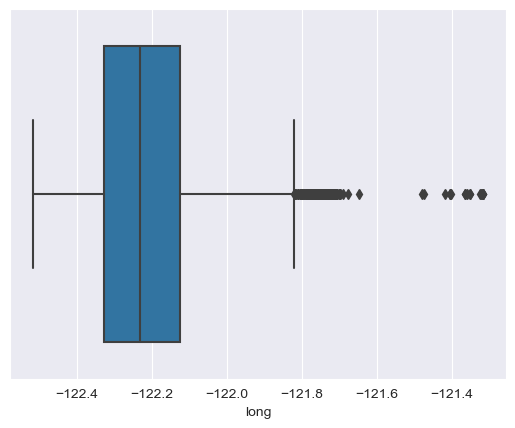

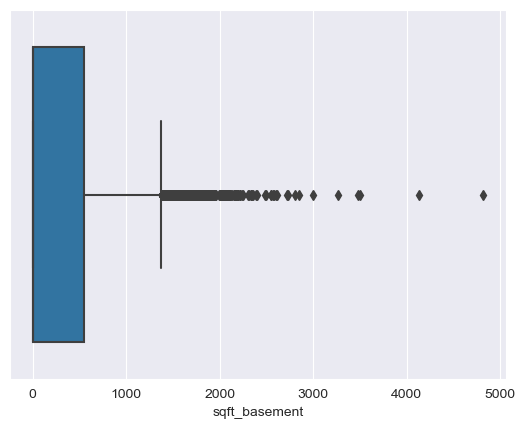

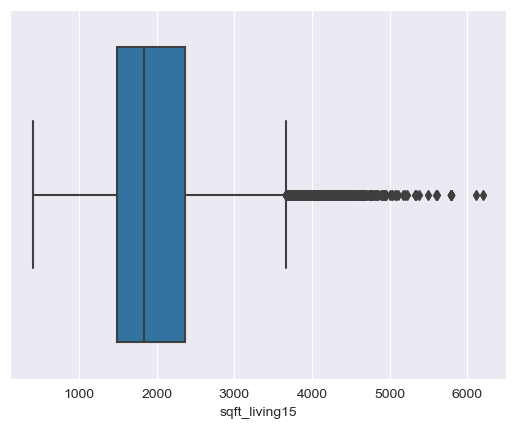

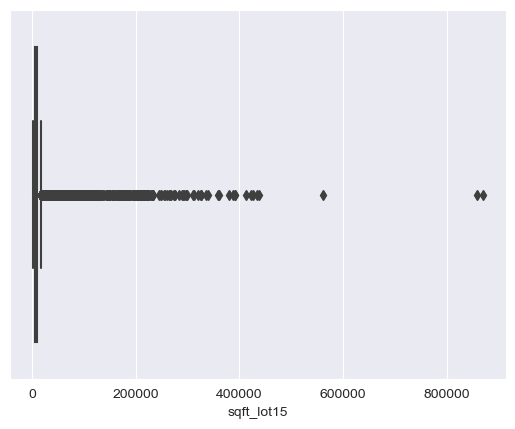

In [735]:
columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'yr_built', 'zipcode', 'lat', 'long','sqft_basement',
       'sqft_living15', 'sqft_lot15']
for col in columns:
    sns.boxplot(x=df[col])
    plt.show()

Based on my understanding of the data I can see that some columns might seem to have outliers , but I will not remove them because this might be actual values that if removed may affect the peformance of our model.

We don't have any more missing values, in our dataset , lets continue with our data preparation

### 2) Checking for and removing multicollinearity

Multicollinerity of features occurs, when one variable can be used to predict another.Multicollinearity becomes a problem because, the whole idea behind linear regression is that there is a linear relationship between variables where as the dependent variable changes, there is also a unit change in the indipendent variable , if we assume that the indipendent variable is kept constant, when the indipendent variables are highly correlated it shows that the indipendent varaible can change as another indipendent variable changes. This becomes a problem to our rgeression model and it is hence advisable to drop one of the indipendent variable that is highly correlated to another indipendent variable.

In [736]:
## We drop the target variable, so that we can fully understand, multicollinearity, this is because if we include our target variable
##It is highly correlated to the factors that predict it and this might make us drop a feature that is supposed to be useful to us
target=df['price']
df_2=df.drop(['price'],axis=1)
df_2



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Lets create a dataframe that contains with the correlated columns and their correlation value.

In [737]:
df_3=df_2.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df_3

C:\Users\Hp\AppData\Local\Temp\ipykernel_14920\3445417200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_3=df_2.corr().abs().stack().reset_index().sort_values(0,ascending=False)


,level_0,level_1,0
0,id,id,1.000000
200,sqft_above,sqft_above,1.000000
60,sqft_living,sqft_living,1.000000
80,sqft_lot,sqft_lot,1.000000
100,floors,floors,1.000000
...,...,...,...
295,lat,sqft_above,0.001199
1,id,bedrooms,0.001150
19,bedrooms,id,0.001150
264,yr_renovated,sqft_living15,0.000683


The above dataframe is not easy to read , hence lets  pair the columns that are highly correlated as shown below.

In [738]:
df_3['pairs']=list(zip(df_3.level_0,df_3.level_1))
df_3.set_index(['pairs'],inplace=True)
df_3.drop(columns=['level_1','level_0'],inplace=True)
df_3.rename(columns={0:'Correlation'},inplace=True)
df_3

,Correlation
pairs,
"(id, id)",1.000000
"(sqft_above, sqft_above)",1.000000
"(sqft_living, sqft_living)",1.000000
"(sqft_lot, sqft_lot)",1.000000
"(floors, floors)",1.000000
...,...
"(lat, sqft_above)",0.001199
"(id, bedrooms)",0.001150
"(bedrooms, id)",0.001150


From ,the above you can see that some columns show some high correlation since they like id and id which form a correlation of 1.00, this is because they are one and the same, lets, create a threshhold to remove colums that are highly correlated ie(correlation=1.00) and columns that have a low correlation(<0.75).We can also see that there are some duplicates like (*bedrooms,id) and (id,bedrooms)* lets go ahead and also drop these duplicates.

In [739]:
#dropping duplicates.
df_3.drop_duplicates(inplace=True)

In [740]:
#Creating a threshhold to remove too low or too high correlations.
df_3[(df_3.Correlation>.77)&(df_3.Correlation<1.0)]

,Correlation
pairs,
"(sqft_above, sqft_living)",0.876448


We can see that we have a high correlation between **sqft_above and sqft_living**, lets go ahead and drop one of these variables so that we do not have multicollinearity.I choose to drop sqft_above, this is because of the two variables ,I find it to be least effective in our analysis.

In [741]:
df.drop(['sqft_above'],axis=1,inplace=True)

### 4)Removing columns that are not needed

This is where we now try to find out more about the data, we can decipher whether it is relevant to us or not and drop the non-relevant variables, we do this by ,<br> i)  plotting a scatter plot to check for linearity , we see whether some of the data can have a probability of forming a linear relationship with our target variable if we do the preprocessing.<br>
ii)Checking the normal distribution, we are checking to see if our variables are normally distributed and if they can change after preprocessing **It should be noted that this is not part of the normality assumption of linear regression because here we rae dealing with variables ,while the assumption is for our model residual.**,<br>
Note:We are doing this before preprocessing, so that we can have a better understanding of which variable is useful to us and  why we need to preprocess our data.

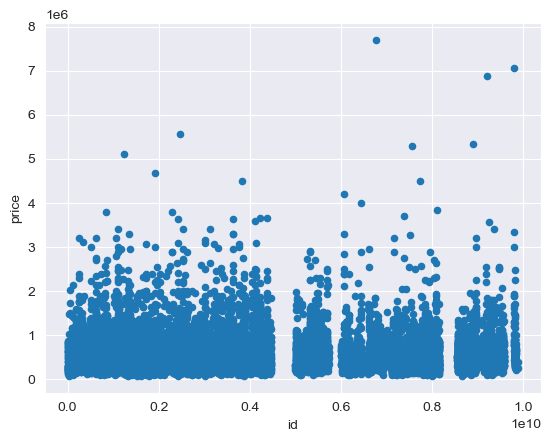

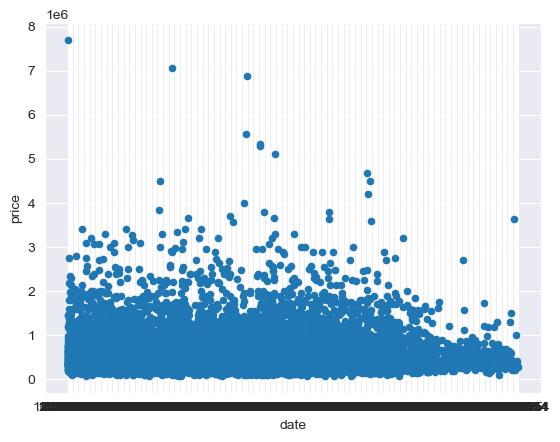

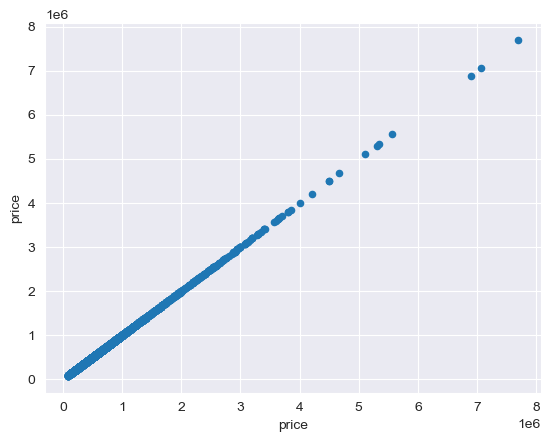

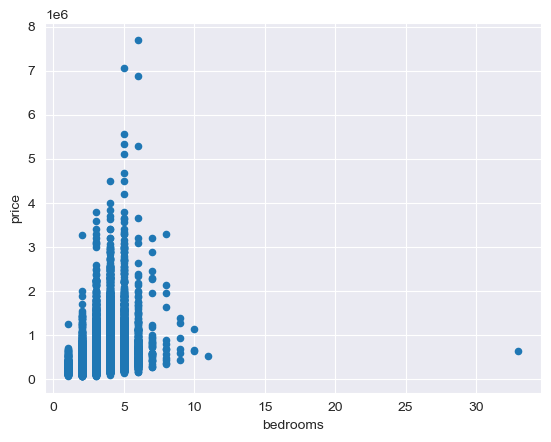

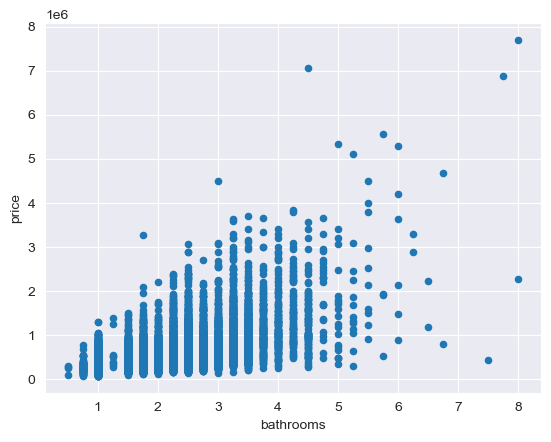

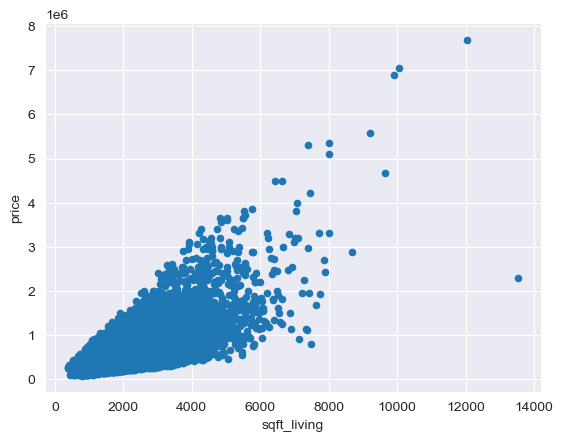

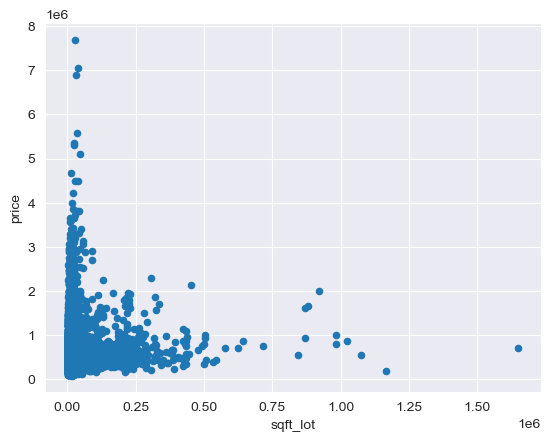

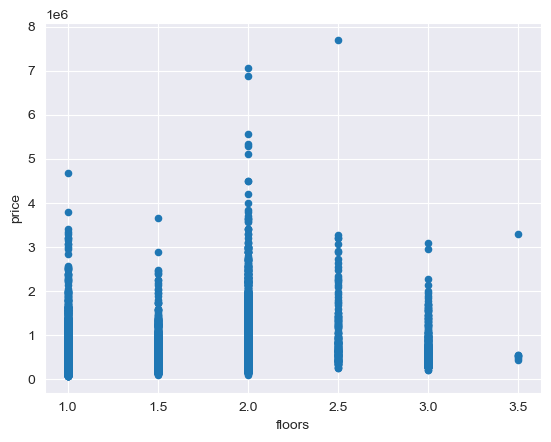

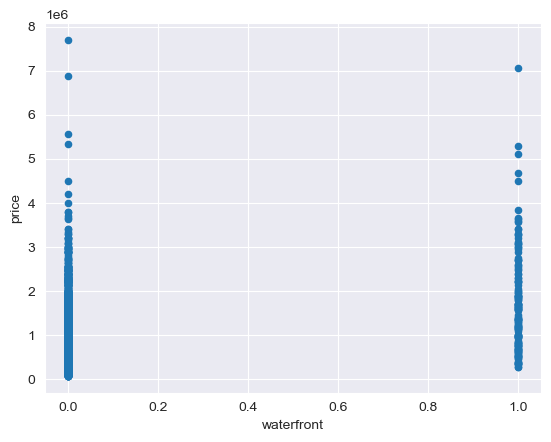

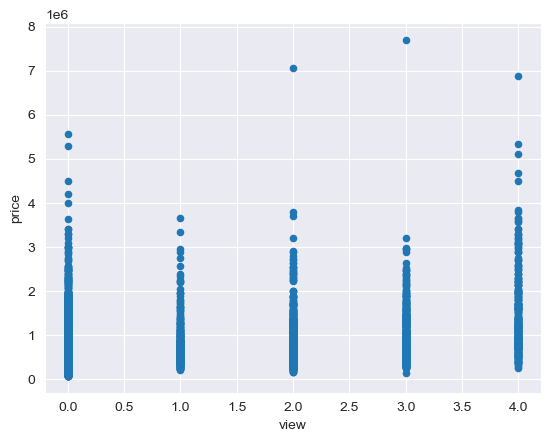

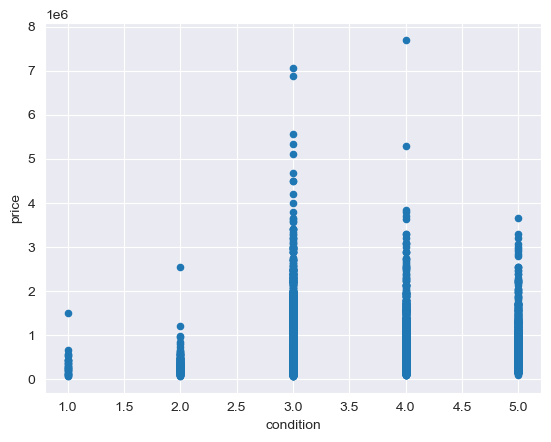

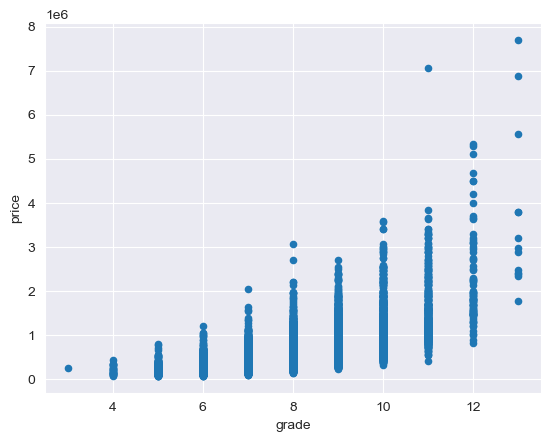

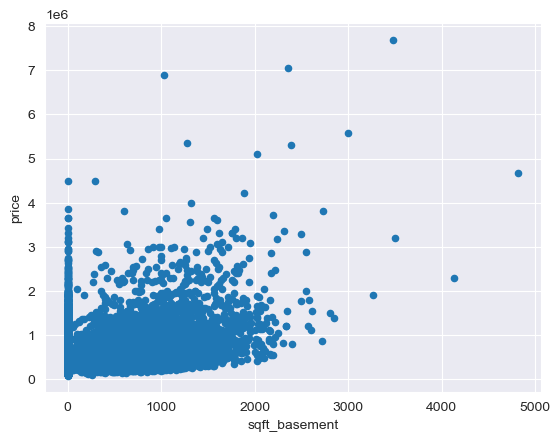

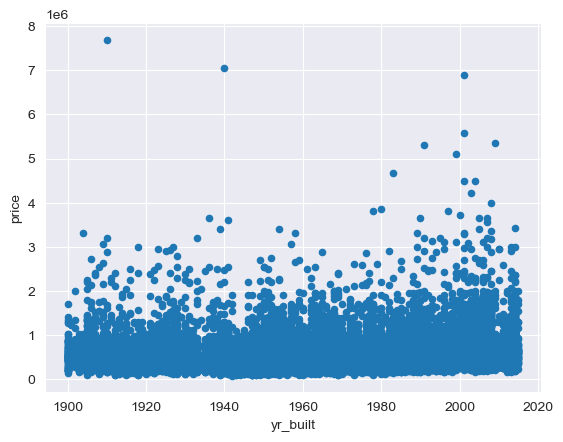

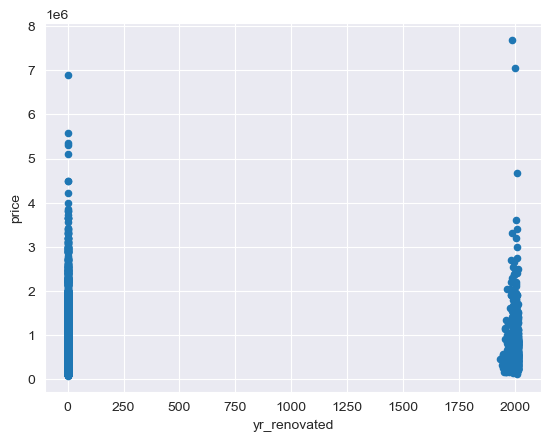

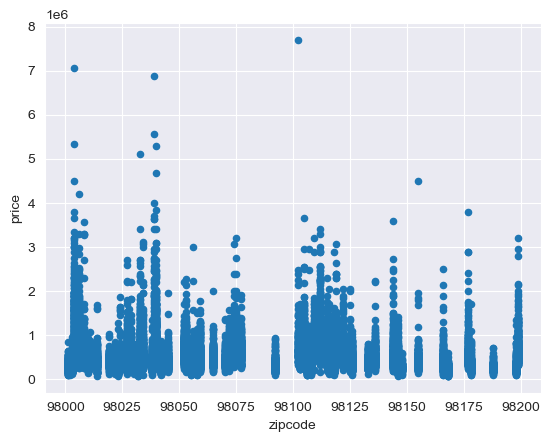

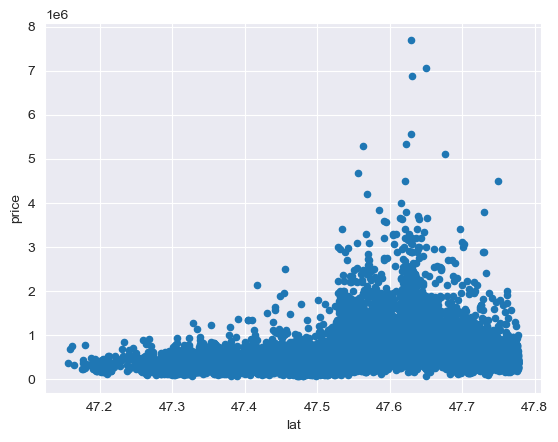

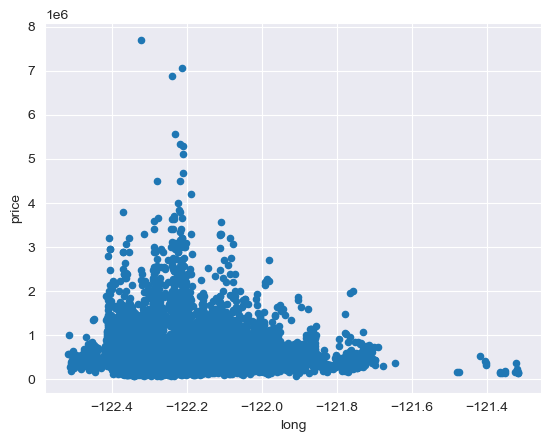

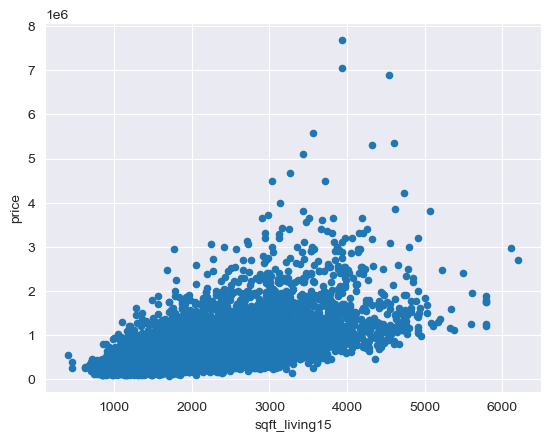

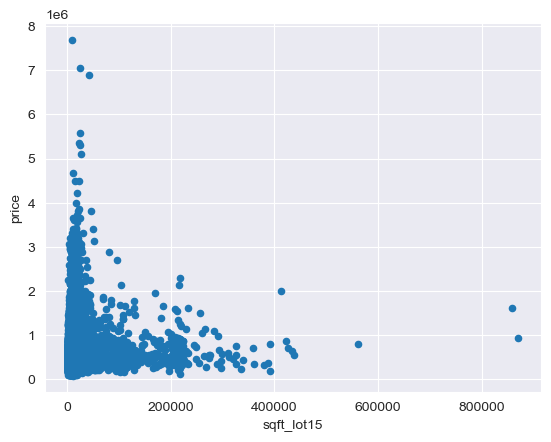

In [742]:
for col in df.columns:
    df.plot.scatter(x=col,y='price')
    plt.show()

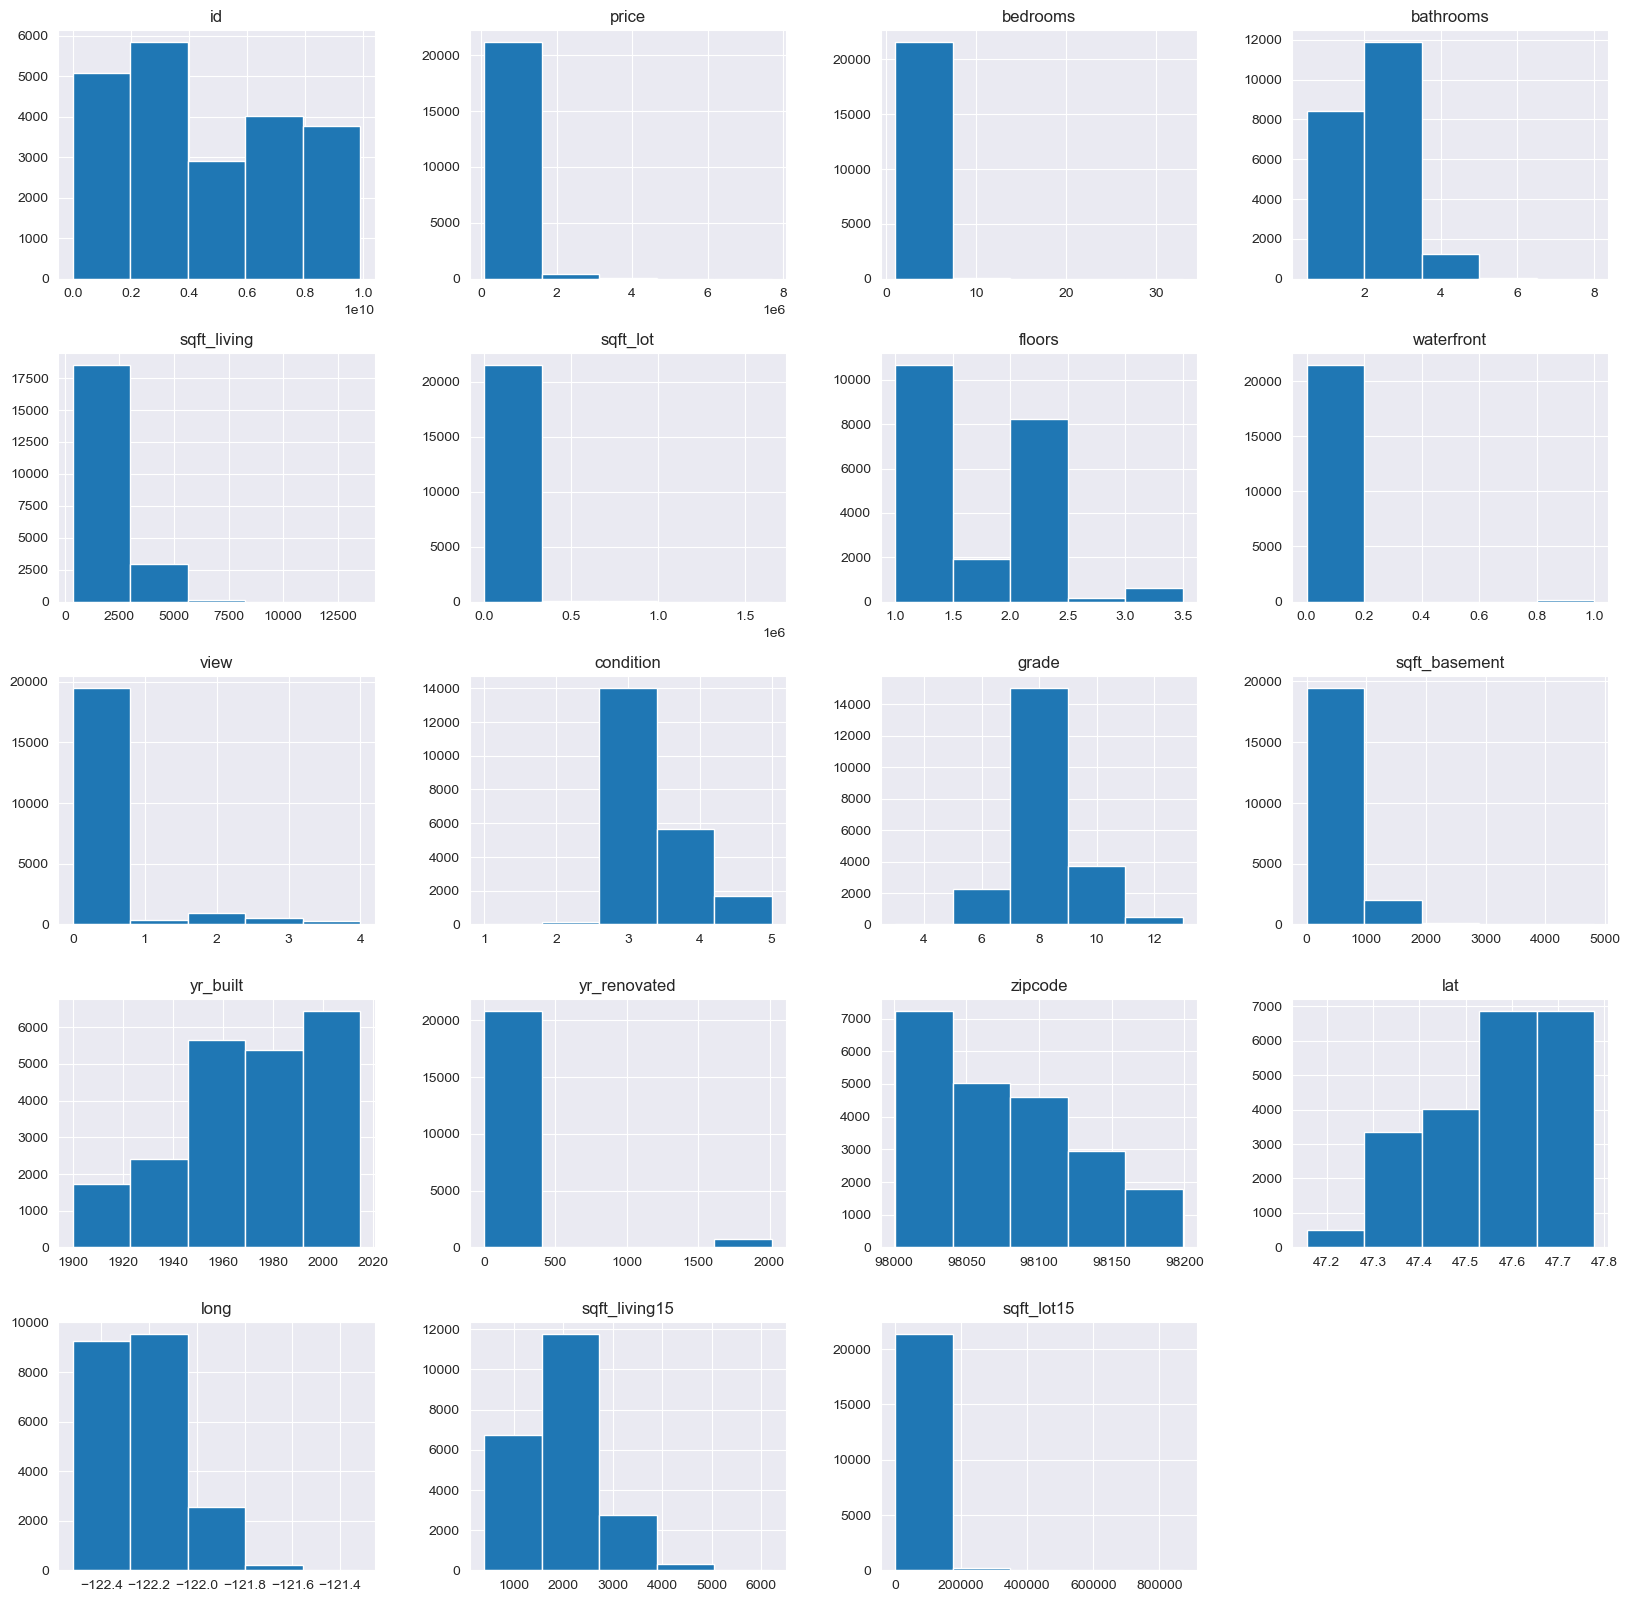

In [743]:
df.hist(bins=5,figsize=[20,20]);

From the above, I can see that we do not need some variables like *id,date, zipcode, lat,long,sqft_basement,sqft_living* because I do not find them useful in my analysis. We can also see that most of our data doesn't follow a normal distribution or linearity hence we should preprocess our variables so that we can improve their distribution and normality.

In [744]:
df.drop(['id','date','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'],inplace=True, axis=1)

### 3) Transforming categorical data

From the data, we have seen that we have some categorical values, categorical values cannot be directly feed to our machine for learnig, hence we need to transform these categorical values, we shall use the pd.Get_dummies method.But firts we need to change our DataFrame into int datatype, this is because if we have this in the float format, this will let affect the treansformation of our categorical variables.

In [745]:
##First, we round the batthroom columms and float since they are in decimal
df.bathrooms=round(df.bathrooms)
df.floors=round(df.floors)
##Then we change the dataFrame into integer format by using the .astype(int)
df=df.astype(int)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,221900,3,1,1180,5650,1,0,0,3,7,1955,0
1,538000,3,2,2570,7242,2,0,0,3,7,1951,1991
2,180000,2,1,770,10000,1,0,0,3,6,1933,0
3,604000,4,3,1960,5000,1,0,0,5,7,1965,0
4,510000,3,2,1680,8080,1,0,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2,1530,1131,3,0,0,3,8,2009,0
21593,400000,4,2,2310,5813,2,0,0,3,8,2014,0
21594,402101,2,1,1020,1350,2,0,0,3,7,2009,0
21595,400000,3,2,1600,2388,2,0,0,3,8,2004,0


Below, lets see the distribution of all of the varaibles that we might think of as categorical variables.

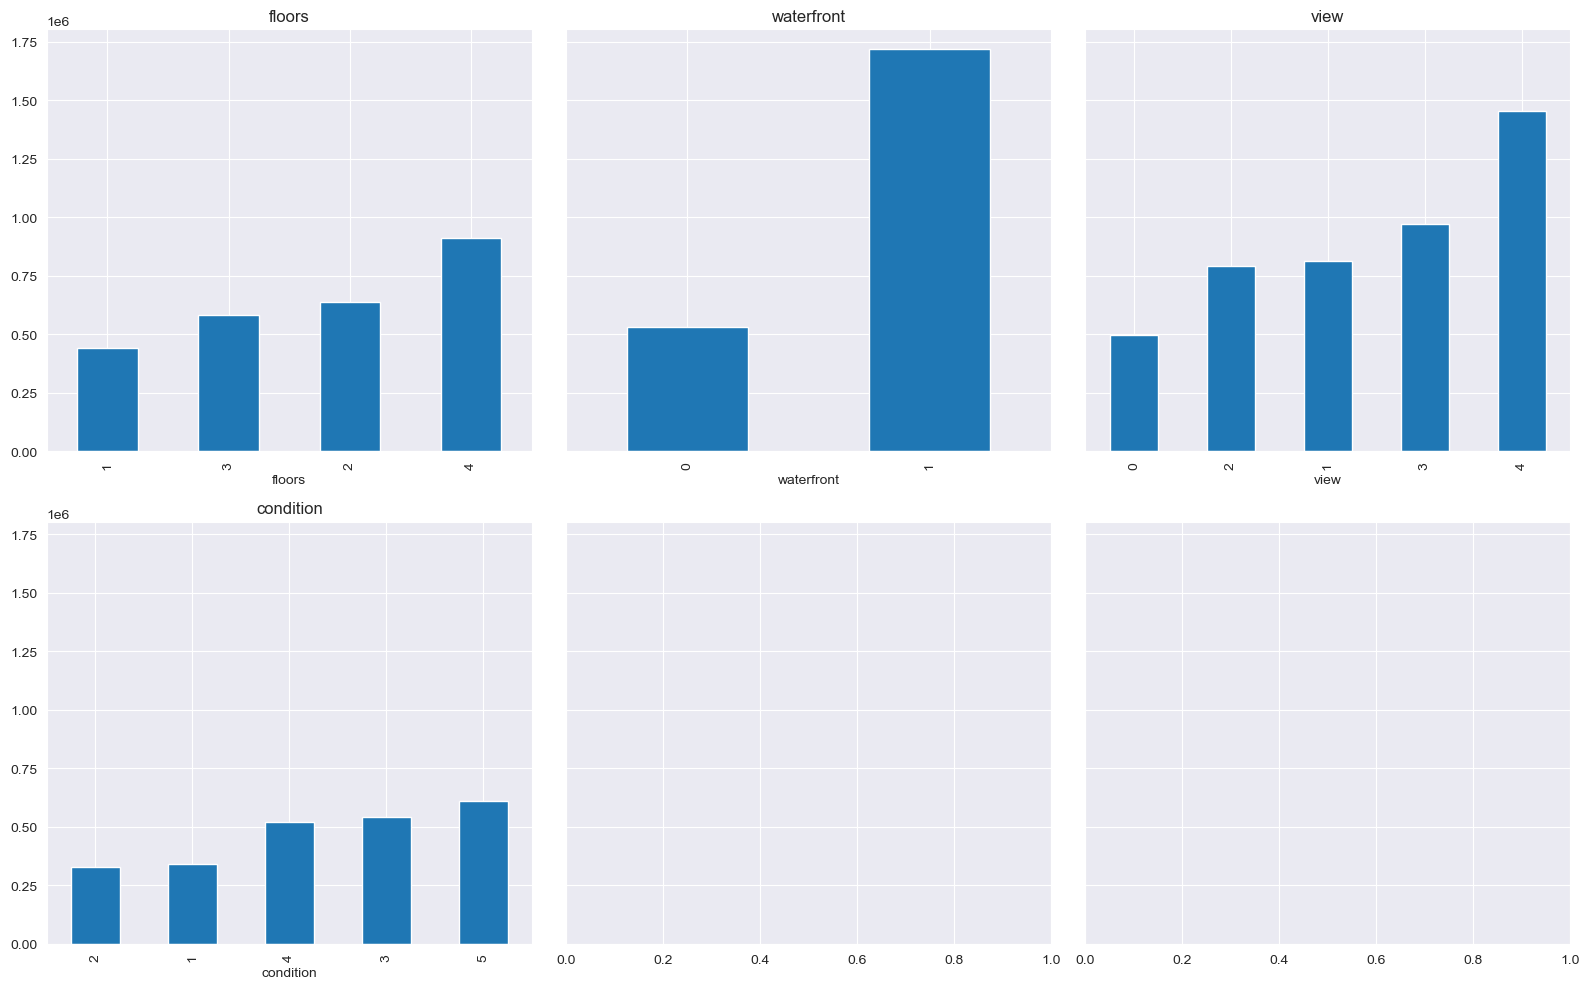

In [746]:

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['floors','waterfront', 'view','condition']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

The above shows that each of this variables are categorical since they form discrete like lines on specific values.

You have seen that we have a column called yr_renovated, this column is not useful to us when it show the number a house was renovated, but can be useful in terms of putting a house into a category of either being renovated or not, this is called **Feature engineering**.We shall put all of the values that have years (values that are above zero) as one, meaning that the house was renovated,else it is a zero meaning that the house is not renovated.

In [747]:
df.loc[df['yr_renovated'] != 0.0,'yr_renovated']=1.0 
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,221900,3,1,1180,5650,1,0,0,3,7,1955,0
1,538000,3,2,2570,7242,2,0,0,3,7,1951,1
2,180000,2,1,770,10000,1,0,0,3,6,1933,0
3,604000,4,3,1960,5000,1,0,0,5,7,1965,0
4,510000,3,2,1680,8080,1,0,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2,1530,1131,3,0,0,3,8,2009,0
21593,400000,4,2,2310,5813,2,0,0,3,8,2014,0
21594,402101,2,1,1020,1350,2,0,0,3,7,2009,0
21595,400000,3,2,1600,2388,2,0,0,3,8,2004,0


Lets see if our above code work, by checking the unique values in the column yr_renovated as shown below.

In [748]:
df.yr_renovated.value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

As we had said earlier, for our model to work well with categorical values, we need to transform those categorical values , we shall use pd.get_dummies , but there are other methods tha one can use like OneHotEncoding.

In [749]:
##Note, we pass drop_first true, so that we can avoid multicollinearity
##Multicollinearity is where a model can predict a certain veriable from a combination of other variables in lay man's language.
waterfront_dummy=pd.get_dummies(df['waterfront'],prefix='waterfront',drop_first=True)
view_dummy=pd.get_dummies(df['view'],prefix='view',drop_first=True)
renovated_dummy=pd.get_dummies(df['yr_renovated'],prefix='yr_renovated',drop_first=True)
floors_dummy=pd.get_dummies(df['floors'],prefix='floors',drop_first=True)
condition_dummy=pd.get_dummies(df['condition'],prefix='condition',drop_first=True)
bathrooms_dummy=pd.get_dummies(df['bathrooms'],prefix='bathrooms',drop_first=True)

dummy_df=pd.concat([waterfront_dummy,view_dummy,renovated_dummy,floors_dummy,condition_dummy,bathrooms_dummy],axis=1)
dummy_df

,waterfront_1,view_1,view_2,view_3,view_4,yr_renovated_1,floors_2,floors_3,floors_4,condition_2,...,condition_4,condition_5,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21594,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 5)Log transformation and Scaling of our data.

From our initial  histogram plot when checking for distributions, we saw that some of our data was not normally distributed.When our data is  not normally distributed, this can affect our model preformance and give us a low R2, to minimize the chances if this, we perform log transformations on our continous variables, as shown below.

In [750]:
#Let us initiate a dataframe 
logged_df=pd.DataFrame([])
# let us get our continous variables.
columns=['bedrooms','sqft_lot', 'sqft_living','grade','yr_built']
##Lets loop through each variable and perform log transformation.
for col in columns:
    logged_df[col]=np.log(df[col])
    
logged_df

,bedrooms,sqft_lot,sqft_living,grade,yr_built
0,1.098612,8.639411,7.073270,1.945910,7.578145
1,1.098612,8.887653,7.851661,1.945910,7.576097
2,0.693147,9.210340,6.646391,1.791759,7.566828
3,1.386294,8.517193,7.580700,1.945910,7.583248
4,1.098612,8.997147,7.426549,2.079442,7.594381
...,...,...,...,...,...
21592,1.098612,7.030857,7.333023,2.079442,7.605392
21593,1.386294,8.667852,7.745003,2.079442,7.607878
21594,0.693147,7.207860,6.927558,1.945910,7.605392
21595,1.098612,7.778211,7.377759,2.079442,7.602900


I prefer confirming that each data type is in float format , though this is not important or needed , it is just a preference. 

In [751]:
logged_df=logged_df.astype(float)

From our data, not all of it is in the same scale, this can affect our model so it is advisable to ensure that our data is in the same scale , here we shall use the standardization, I will do this manually , but one can use the sklearn's standard scaler
The formula of standardization is X-mean(x)/variance(x) .

In [752]:
scale_df=pd.DataFrame([])
##We get the column names in the logged_df and loop through each column and scale the values.
columns=logged_df.columns
cols=logged_df[columns]

for column in cols:
    col2=logged_df[column]
    scale_df[column]=(col2-np.mean(col2))/(np.sqrt(np.var(col2)))
scale_df    


    


,bedrooms,sqft_lot,sqft_living,grade,yr_built
0,-0.279725,-0.388439,-1.125582,-0.525943,-0.537421
1,-0.279725,-0.113243,0.709463,-0.525943,-0.674341
2,-1.711651,0.244481,-2.131943,-1.558145,-1.293975
3,0.736243,-0.523926,0.070676,-0.525943,-0.196343
4,-0.279725,0.008140,-0.292732,0.368190,0.547959
...,...,...,...,...,...
21592,-0.279725,-2.171645,-0.513218,0.368190,1.284066
21593,0.736243,-0.356909,0.458017,0.368190,1.450238
21594,-1.711651,-1.975424,-1.469095,-0.525943,1.284066
21595,-0.279725,-1.343145,-0.407754,0.368190,1.117479


# Modelling

In this stage we shall create our model.Our model is going to be a regression since this is a regression task where , we are trying to establish the strgenth between our features and the target variable(**Price**),based on the validity of this relationship, we can then be able to predict certain features.We shall start by getting our cleaned data

In [754]:
## here we are getting the DataFrame with our already clean and normalized data 
##Let us concatinate all of the cleaned data (the encoded categorical and scaled data) to form one final dataframe
price=np.log(df['price'])
df_fin=pd.concat([scale_df,price,dummy_df],axis=1)
df_fin

,bedrooms,sqft_lot,sqft_living,grade,yr_built,price,waterfront_1,view_1,view_2,view_3,...,condition_4,condition_5,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8
0,-0.279725,-0.388439,-1.125582,-0.525943,-0.537421,12.309982,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.279725,-0.113243,0.709463,-0.525943,-0.674341,13.195614,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.711651,0.244481,-2.131943,-1.558145,-1.293975,12.100712,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.736243,-0.523926,0.070676,-0.525943,-0.196343,13.311329,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,-0.279725,0.008140,-0.292732,0.368190,0.547959,13.142166,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.279725,-2.171645,-0.513218,0.368190,1.284066,12.793859,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0.736243,-0.356909,0.458017,0.368190,1.450238,12.899220,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21594,-1.711651,-1.975424,-1.469095,-0.525943,1.284066,12.904459,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,-0.279725,-1.343145,-0.407754,0.368190,1.117479,12.899220,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Our target variable is price, lets put it as y and all the other variables in our final data frame as x

In [755]:
y=df_fin['price']
x=df_fin.copy()
x=x.drop('price',axis=1)

x

,bedrooms,sqft_lot,sqft_living,grade,yr_built,waterfront_1,view_1,view_2,view_3,view_4,...,condition_4,condition_5,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8
0,-0.279725,-0.388439,-1.125582,-0.525943,-0.537421,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.279725,-0.113243,0.709463,-0.525943,-0.674341,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.711651,0.244481,-2.131943,-1.558145,-1.293975,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.736243,-0.523926,0.070676,-0.525943,-0.196343,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,-0.279725,0.008140,-0.292732,0.368190,0.547959,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.279725,-2.171645,-0.513218,0.368190,1.284066,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21593,0.736243,-0.356909,0.458017,0.368190,1.450238,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21594,-1.711651,-1.975424,-1.469095,-0.525943,1.284066,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,-0.279725,-1.343145,-0.407754,0.368190,1.117479,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 1)Checking for linear regression assumptions

Before we start modelling , it is always relevant to find out whether our data check the linear regression assumptions,these assumptions include:<br><br>
1)<font color=green>Linearity</font>:This checks if our predictors have a linear relationship with our target variable,if this assumption is ignored this could lead to a Bais in our model.*You can check this assumption by plotting a scatter plot of the predictors against the target varaible*<br><br>
2)<font color=green>Normality assumption</font>: This checks if our model Residuals follow a normal distibution , *this can be done by a histogram, Q-Q plot or a Jarque-Bera test,one should usewhich ever method they find suitable*, it should be noted that **This assumption is for the model residuals and not the variables,still ,it is good to check if your variables follow a normal distribution**<br><br>
3<font color=green>Homoscedacity</font> :This is checking whether the depend variables varry equally across the values of an indipendent variable, ie when you plot a scatter plot of the model residuals they should be equally scattered across your visualisation and should not be forming a cone-like shape as that would indicate heteroscedacity.A good way to check for homoscedacity is by plotting a scatter plot of the residuals,using significance tests like, *Breuchs-pagan/Cook-weisburg test, white general test or Goldfield-Quandt test*<br>


#### a) Checking for linearity assumptions

Here, we shall plot a scatter plot of each indipendent variable against the price(Our target variable).

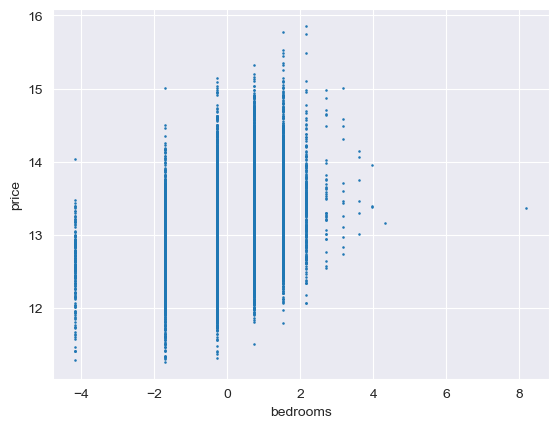

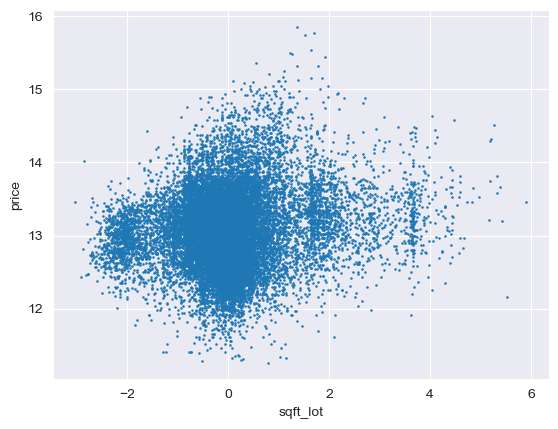

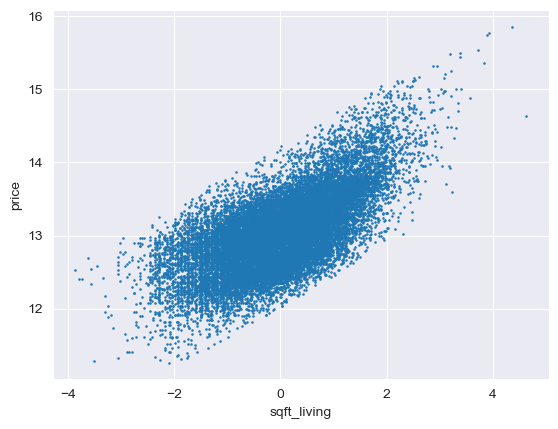

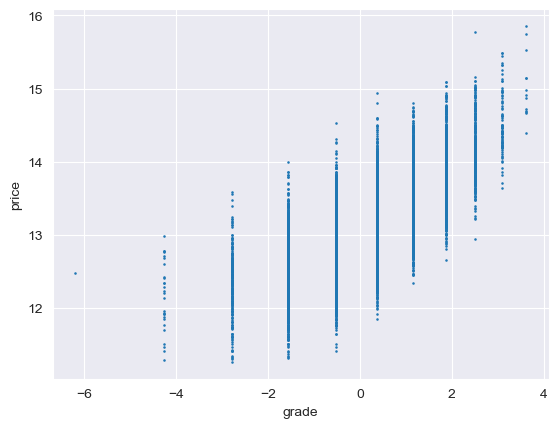

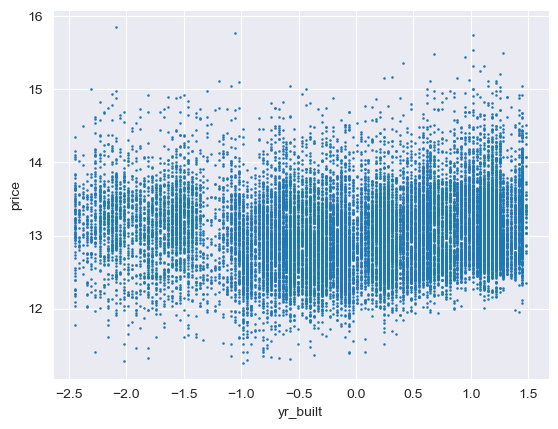

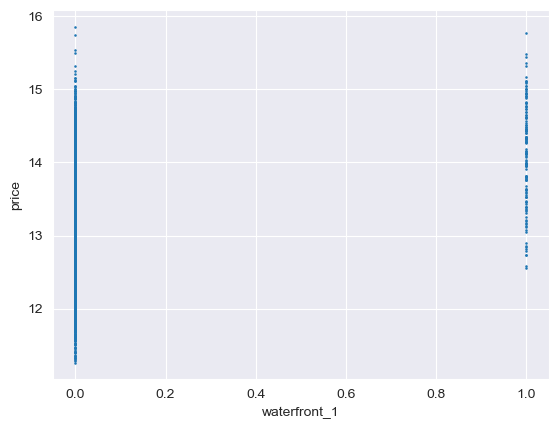

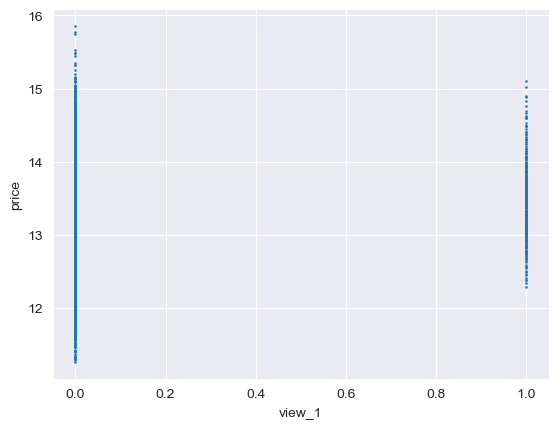

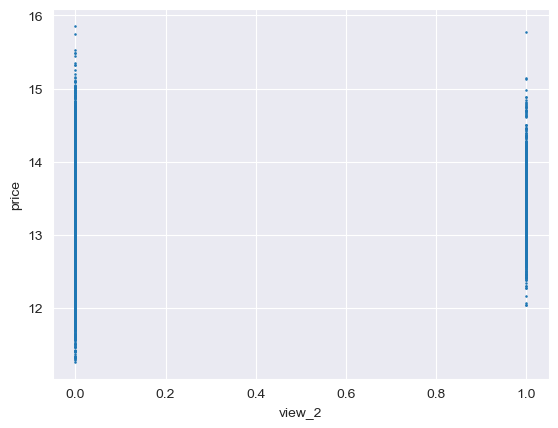

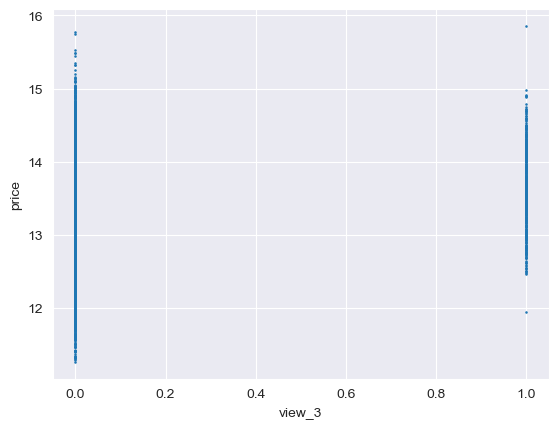

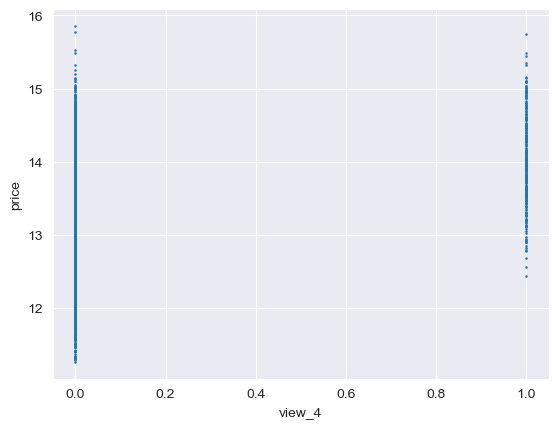

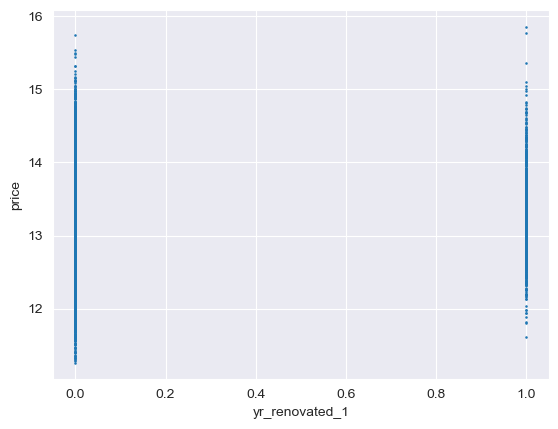

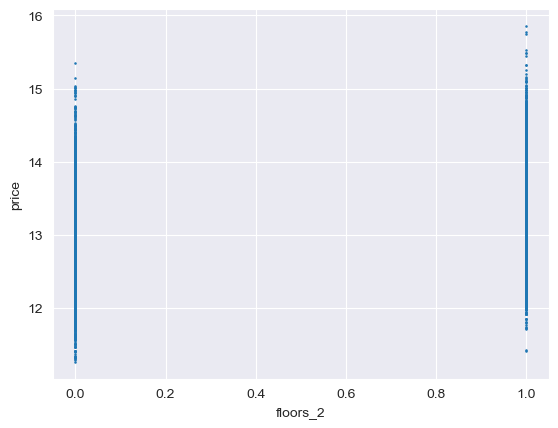

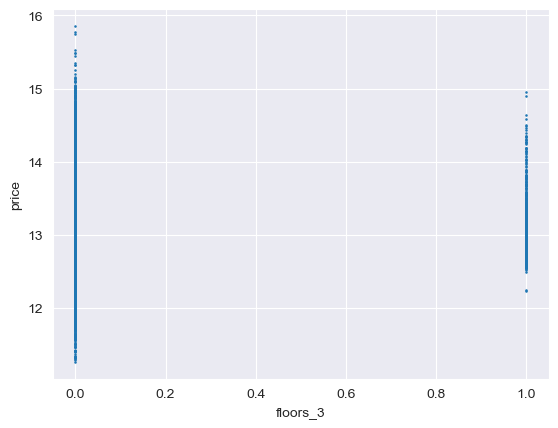

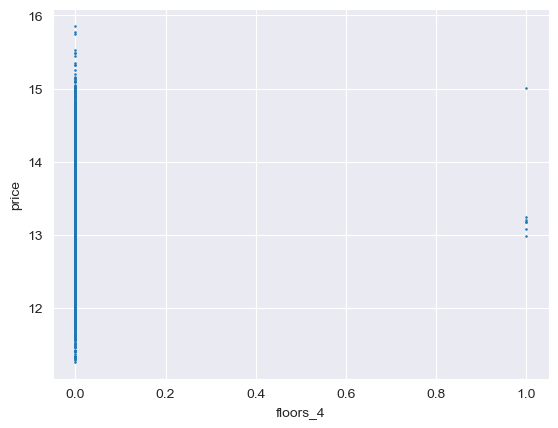

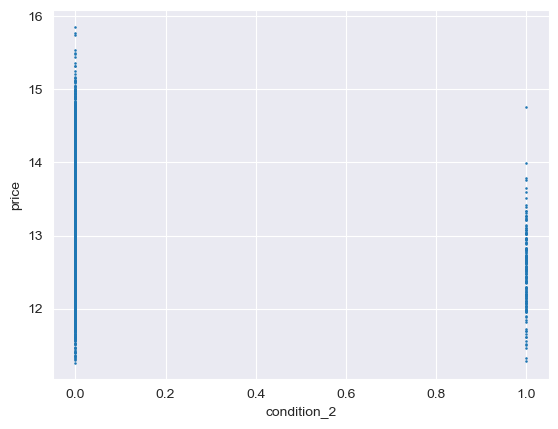

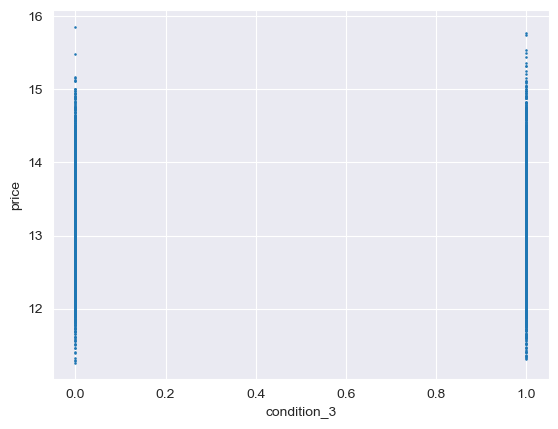

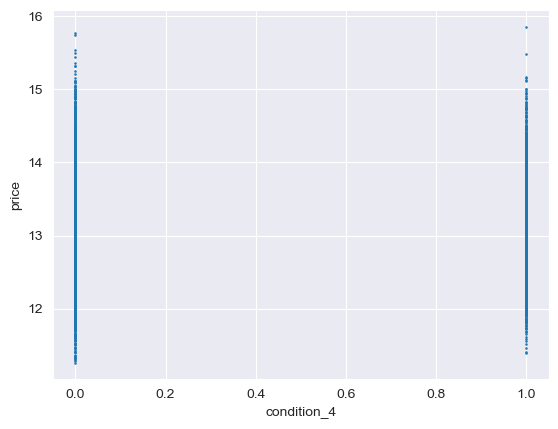

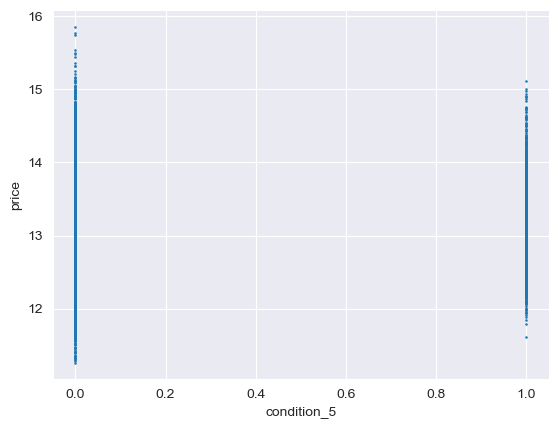

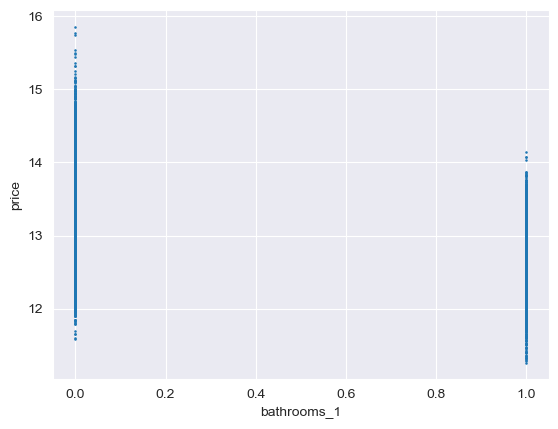

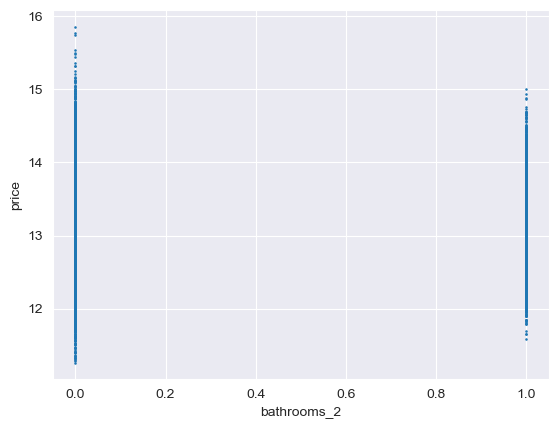

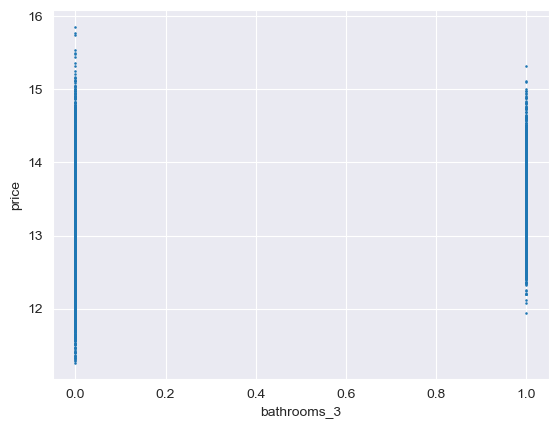

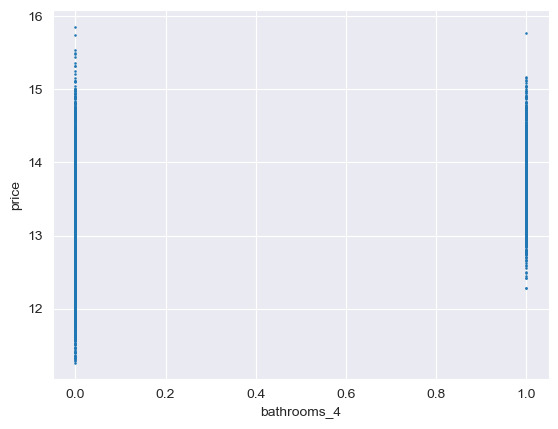

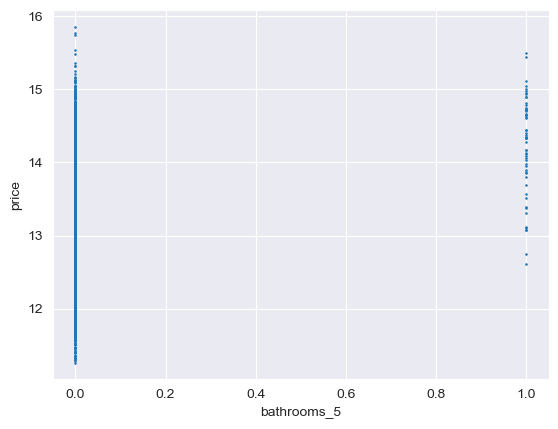

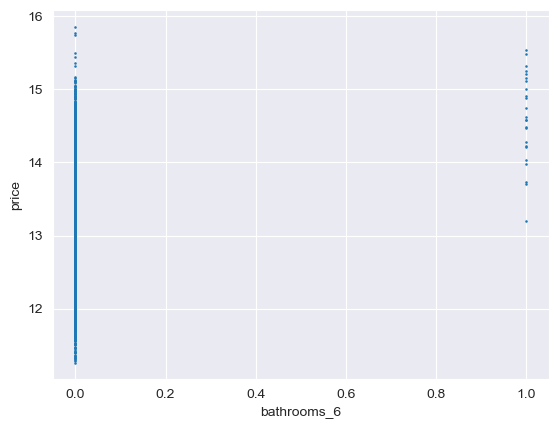

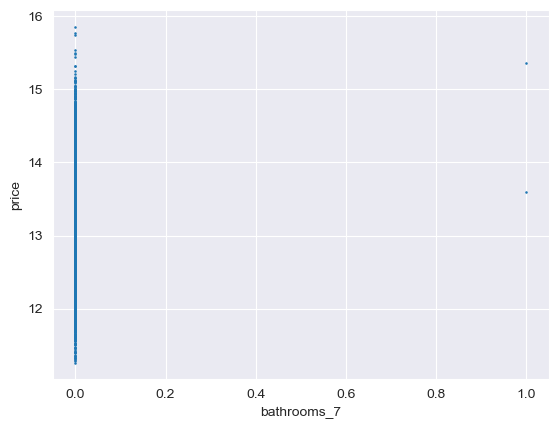

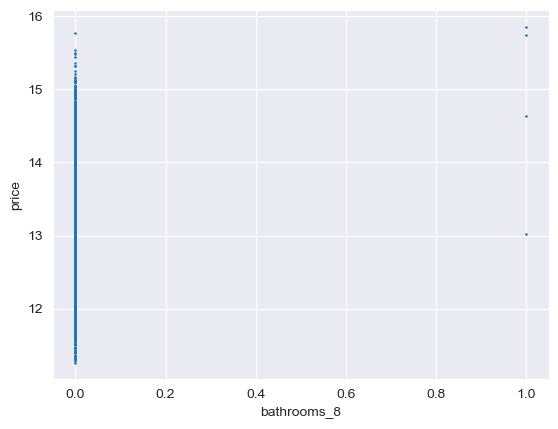

In [756]:
for col in x.columns:
    df_fin.plot.scatter(x=col,y='price',s=0.7)
    plt.show()

From the above visualisations, you can see that most of our variables do not have a linear relationship with our target variable hence it is not advisable to use them in our model.You can see that the variable that form a linear relationship with our target variable are **sqft_living and sqft_living15** , lets go ahead and create a model with the variable *sqft_living*

### 2) Building a simple linear regression

Lets build a linearregression model between our predictor variable(**price**) and every column in our final dataset, so that we can have a better idea of which variable gives us the highest R2 

In [676]:
for column in df_fin.columns:
    x1=pd.DataFrame(df_fin[column])
    linereg=LinearRegression()
    linereg.fit(x1,y)
    
    print(column+'R2 :'+str(r2_score(y,linereg.predict(x1))))

    


bedroomsR2 :0.11754631413054473
sqft_lotR2 :0.01911602756307318
sqft_livingR2 :0.45535727584899854
gradeR2 :0.48140987370294064
yr_builtR2 :0.0062388819372634075
priceR2 :1.0
waterfront_1R2 :0.029145322638964632
view_1R2 :0.009539732223696196
view_2R2 :0.025151281298407713
view_3R2 :0.02982912698159046
view_4R2 :0.05018474486527591
yr_renovated_1R2 :0.011348198682779143
floors_2R2 :0.09640881667814272
floors_3R2 :0.0015225716091198382
floors_4R2 :0.0001522155547958315
condition_2R2 :0.0074124009757028375
condition_3R2 :0.00048100135974982194
condition_4R2 :0.0016654539300744453
condition_5R2 :0.0037391163123602356
bathrooms_1R2 :0.11971798662507516
bathrooms_2R2 :0.003443749356147885
bathrooms_3R2 :0.05697581377236638
bathrooms_4R2 :0.10728480588303424
bathrooms_5R2 :0.013489242846856375
bathrooms_6R2 :0.009816541102933507
bathrooms_7R2 :0.0006795727476508473
bathrooms_8R2 :0.0020850985039357894


Some of these variables form a very low r2 and others a good r2, since our variable **sqft_living** forms the best linear relationship with our target variable, lets go ahead and create a linear regression with just that variable.

In [757]:

model=ols(formula='price~sqft_living', data=df_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:26:25   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0482      0.003   4934.443      0.000      13.043      13.053
sqft_living     0.3553      0.003    134.368      0.000       0.350       0.360
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see above , we have a very low R2 of 0.455 this means that our model has a poor line of fit and we can only 45% of our predictions will be correct, lets go below and check if other assumptions of linearity are ignored (which might be causing our R2 to be low ) and if there is something else we can do to improve our model

#### c)  Checking for Normality in the model residuals

Remember that we said that for linear regression we have to check the *normality assumption* , here we shall use the Q-Q plots.

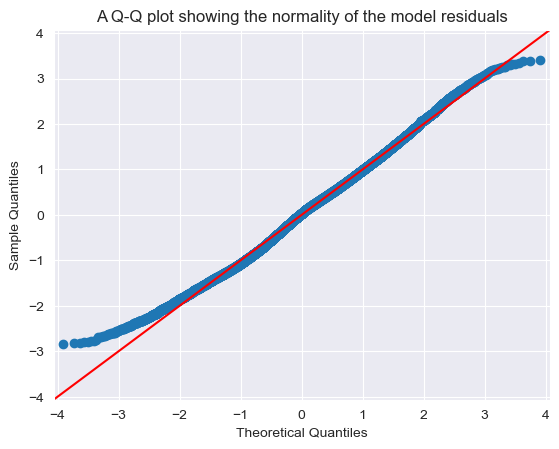

In [758]:

residual=model.resid
fig=sm.graphics.qqplot(residual,dist=stats.norm,line='45',fit=True)
plt.title('A Q-Q plot showing the normality of the model residuals')
plt.show();

As you can see our Q-Q plot show a that our residuals are normally distributed, although we do have an outlier

#### d)Checking for the homoscedacity assumptions

Here, we shall use a goldfeld-quandt test, this uses the hypothesis analogy, where the **Null hypothesis is :Our data is homoscedastic** while , the **Alternative hypothesis : Our data is not homoscedastic.** We shall then prove homoscedacity or heteroscedacity based on our *P-value*.

In [759]:
gq_test = pd.DataFrame(sms.het_goldfeldquandt(residual, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

gq_test

,value
F statistic,0.964994
p-value,0.967927


Our p_value is greater than 0.05 hence we fail to reject the null hypothesis, this means that our data is homoscedatic.

##### e) Interactions 

From our above analysis, we have seen that our r2 is low, one of the ways to increase our R2 is to create an interaction between two variables.An interact is a way of affectinng our target variable in a non-additive manner,according to what I understood, if we create an interactions between two variables, we can affect our target variables without affecting the variables that we used to make the interaction.Below I will create an interaction between our *sqft_living* and all other variables, to see which variables form a high interaction.

In [760]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact_2 = x.copy()

for one in X_interact_2.columns:
    X_interact_2['sqft_living_lat'] = x['sqft_living'] * x[one]
    linereg3=LinearRegression()
    linereg3.fit(X_interact_2,y)
    r2=r2_score(y,linereg3.predict(X_interact_2))
    print(one+' : '+str(r2))
                                                           

    



bedrooms : 0.6557969238407666
sqft_lot : 0.6536151058787629
sqft_living : 0.6573603942399362
grade : 0.6574744903112582
yr_built : 0.6548780318186073
waterfront_1 : 0.6533243984485704
view_1 : 0.6532223494561273
view_2 : 0.6533261109440005
view_3 : 0.6532140917038343
view_4 : 0.6532309480915208
yr_renovated_1 : 0.6533909912014895
floors_2 : 0.6535591570749745
floors_3 : 0.6532137369479859
floors_4 : 0.6532157027945927
condition_2 : 0.6532341243319257
condition_3 : 0.6532172696747034
condition_4 : 0.6532237338154223
condition_5 : 0.6533128807555185
bathrooms_1 : 0.6556641838333418
bathrooms_2 : 0.6534067538684899
bathrooms_3 : 0.6537406143383558
bathrooms_4 : 0.6534901522623421
bathrooms_5 : 0.6532680035052427
bathrooms_6 : 0.6532419825132465
bathrooms_7 : 0.6533064796869135
bathrooms_8 : 0.6532189029741358


 We ignore interactions between sqft_living and (price,sqft_living) This will not be meaningful interactions.Now from the above we can see that the features with the there are so many features with a highest R2 after an interaction between, lets go ahead and create a model with the an interaction of some of these features.

I will use four grades to show the interaction between this variables, this is because there are so many grades even though it is categorical.

In [761]:
##Getting different dataframes for the different grades.
## The first dataframe will contain data where the grade is 7 
grade_7=df[df['grade']==7]
#A df where grade is 6
grade_6=df[df['grade']==6]
# a df where grade eis 8 then9
grade_8=df[df['grade']==8]
grade_9=df[df['grade']==9]


In [762]:
##Initiation our linear regression
regression1 = LinearRegression()
regression2 = LinearRegression()
regression3 = LinearRegression()
regression4 = LinearRegression()

In [763]:
##OWe want to use the sqft_living column for each variable but we cannot use this if we don't change the shape
grade_7_house= grade_7['sqft_living'].values.reshape(-1, 1)
grade_6_house = grade_6['sqft_living'].values.reshape(-1, 1)
grade_8_house = grade_8['sqft_living'].values.reshape(-1, 1)
grade_9_house = grade_9['sqft_living'].values.reshape(-1, 1)
#Fitting our various dataframes into the relevant model                                                     
                                                      

In [766]:
regression_1.fit(grade_7_house,grade_7['price'])
regression_2.fit(grade_6_house, grade_6['price'])
regression_3.fit(grade_8_house, grade_8['price'])
regression_4.fit(grade_9_house, grade_9['price'])
# Make predictions using the testing set for our various grades.
pred_1 = regression_1.predict(grade_7_house)
pred_2 = regression_2.predict(grade_6_house)
pred_3 = regression_3.predict(grade_8_house)
pred_4 = regression_4.predict(grade_9_house)
# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)
print(regression_4.coef_)

[98.09493919]
[79.6677283]
[135.19692487]
[174.69932622]


This can be hard to interpret, so lets go ahead and represent our findings in a visualisation

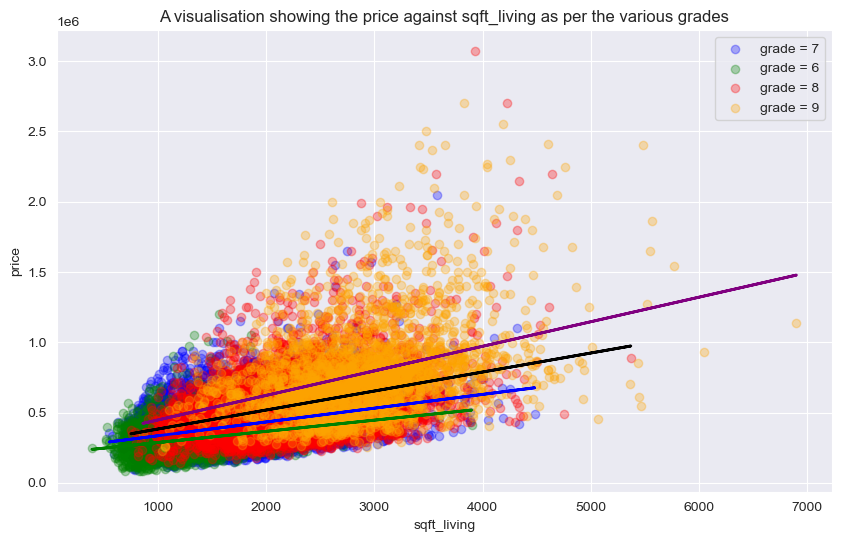

In [767]:
# Plot outputs
plt.figure(figsize=(10,6))
#Plotting a scatter plot for each grade , showing a distribution of their sqft_living and their sale price
plt.scatter(grade_7_house, grade_7['price'],  color='blue', alpha=0.3, label = 'grade = 7')
plt.scatter(grade_6_house, grade_6['price'],  color='green', alpha=0.3, label = 'grade = 6')
plt.scatter(grade_8_house, grade_8['price'],  color='red', alpha=0.3, label = 'grade = 8')
plt.scatter(grade_9_house, grade_9['price'],  color='orange', alpha=0.3, label = 'grade = 9')
##Plotting our linear model of each grade.
plt.plot(grade_7_house, pred_1, color='blue', linewidth=2)
plt.plot(grade_6_house, pred_2, color='green', linewidth=2)
plt.plot(grade_8_house, pred_3, color='black', linewidth=2)
plt.plot(grade_9_house, pred_4, color='purple', linewidth=2)
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.title('A visualisation showing the price against sqft_living as per the various grades')
plt.legend();

Based on our presentation above, there seems to be no interaction between these variables , because they are forming parralel lines, but the two variables when predicting price shows an additive relationship.Based on the visualization, we can say that when the grade is high and the sqft_living is high, our price is relatively higher.Nonetheless, including this interaction improves the R2 of our model as shown below.

In [789]:
x_interact=x.copy()
linreg=LinearRegression()
##Performing an interaction between grade and sqft_living
##An interaction is performed by multiplying the variables forming the interaction.
x_interact['sqft_living_grade']=x['sqft_living']*x['grade']
linreg.fit(x_interact,y)

LinearRegression()

In [790]:
r2_score(y,linreg.predict(x_interact))

0.6574744903112582

Based on our analysis , we can see that there is an improvement in our R2 where initially is was **0.483** but now it is **0.654**.Meaning that our predictions would be 68% accurate.

Lets go ahead and plot a visualisation of our above analysis findings

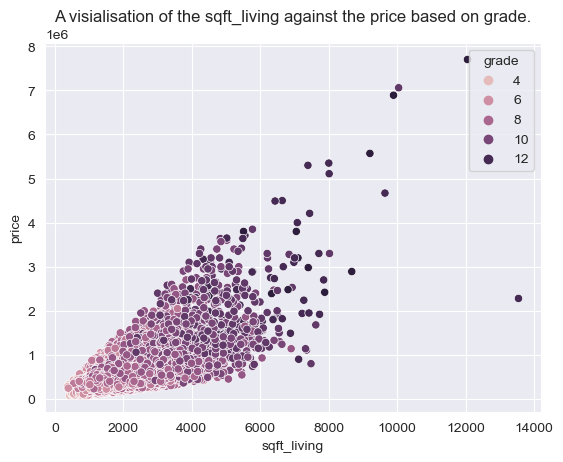

In [770]:
sns.scatterplot(data=df,x='sqft_living',y='price',hue='grade')
plt.title('A visialisation of the sqft_living against the price based on grade.')
plt.show();

From the above visualisation, shows that as the sqft_living and the grade go high, so does the amount of sale price for the house, this shows that these two are good features that attract customers to buy more houses.

We can also do an interaction between the year built and sqft_living and the price.We will select these houses based on the mean.where houses that were built below the mean value are old and those above the mean value are newly built

In [809]:
##Lets get the mean year of the yr_built column
df.yr_built.mean()

1970.9996758809093

In [810]:
##Getting two dataframes, one with old houses(houses built below a960)
old_houses=df.loc[df['yr_built']<1970]
new_houses=df.loc[df['yr_built']>1970]
##Initiating our linear regression
regression_1 = LinearRegression()
regression_2 = LinearRegression()
#Reshaping our sqft_living
houses_1 = old_houses['sqft_living'].values.reshape(-1, 1)
houses_2 = new_houses['sqft_living'].values.reshape(-1, 1)
#Fitting our data
regression_1.fit(houses_1, old_houses['price'])
regression_2.fit(houses_2, new_houses['price'])

# Make predictions using the testing set
pred_1 = regression_1.predict(houses_1)
pred_2 = regression_2.predict(houses_2)
r2=r2_score(new_houses['price'],pred_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

[314.8527308]
[293.79201911]


Lets go ahead and visualize this for easy interpretation

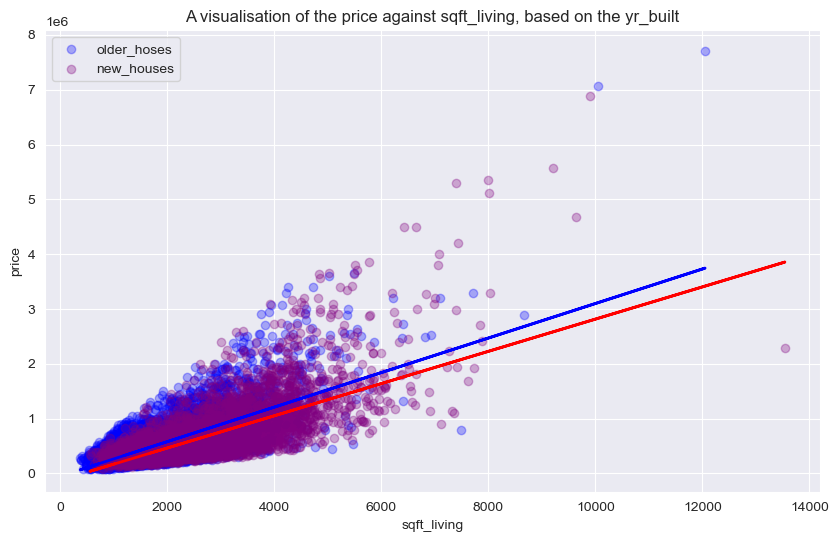

In [811]:
# Plot outputs
plt.figure(figsize=(10,6))
#plotting a scatter plot of the various sqft_living against their prices as per the yr_built
plt.scatter(houses_1, old_houses['price'] , color= 'blue', alpha = 0.3, label = 'older_hoses')
plt.scatter(houses_2, new_houses['price'],  color='purple', alpha = 0.3, label = 'new_houses')
##Plotting our linear model line
plt.plot(houses_1, pred_1,  color='blue', linewidth=2)
plt.plot(houses_2, pred_2,  color='red', linewidth=2)

plt.ylabel('price')
plt.xlabel('sqft_living')
plt.title('A visualisation of the price against sqft_living, based on the yr_built')
plt.legend();

From the above, we can see that the lines are almost intersecting, meaning that there is not so much of an interaction  since they aren't intersecting, regardless, lets go ahead and see what happens to our r2 if we use this intersection

In [793]:
x_interact2=x.copy()
linreg=LinearRegression()
##Performing an interaction between grade and sqft_living
##An interaction is performed by multiplying the variables forming the interaction.
x_interact2['sqft_living_grade']=x['sqft_living']*x['yr_built']
linreg.fit(x_interact,y)

LinearRegression()

In [794]:
r2_score(y,linreg.predict(x_interact2))

0.6548780318186073

You can see that our R2 improves, but this is really not useful because there is not much of an interaction between the two variables yr_built and sqft_living

How about an interaction between yr_renovated and sqft_living.Here, we out our variables, into two categorise thsi into the houses that were renovated and houses that were not renovated and create an intercation as follows.

In [776]:
#Df 1 contains houses that were not renovated and  2 the houses that were renovated.
renovated_1=df[df['yr_renovated']!=1]
renovated_2=df[df['yr_renovated']==1]
renovated_2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
1,538000,3,2,2570,7242,2,0,0,3,7,1951,1
35,696000,3,2,2300,3060,2,0,0,3,8,1930,1
95,905000,4,2,3300,10250,1,0,0,3,7,1946,1
103,1090000,3,2,2920,8113,2,0,0,3,8,1950,1
125,1450000,4,3,2750,17789,2,0,0,3,8,1914,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19602,451000,2,1,900,6000,1,0,0,3,7,1944,1
20041,434900,3,2,1520,5040,2,0,0,3,7,1977,1
20428,500012,4,2,2400,9612,1,0,0,3,8,1962,1
20431,356999,3,2,1010,1546,2,0,0,3,8,1971,1


We follow the previous steps.

In [777]:
#initiate a linear regression
regression_8=LinearRegression()
regression_9 = LinearRegression()
# we want to use sqft_living hence we reshape it to the right format
renovated_1_house = renovated_1['sqft_living'].values.reshape(-1, 1)
renovated_2_house = renovated_2['sqft_living'].values.reshape(-1, 1)
#we fit our data into our model
regression_8.fit(renovated_1_house, renovated_1['price'])
regression_9.fit(renovated_2_house, renovated_2['price'])

# Make predictions using the testing set
pred_1 = regression_8.predict(renovated_1_house)
pred_2 = regression_9.predict(renovated_2_house)

# The coefficients
print(regression_8.coef_)
print(regression_9.coef_)


[269.85942342]
[462.19904448]


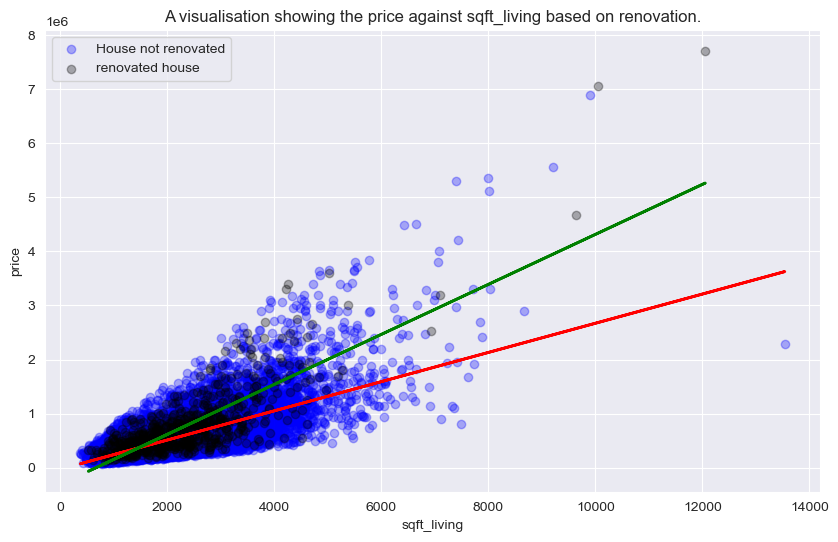

In [778]:
# Plot outputs
plt.figure(figsize=(10,6))
#plotting a scatter plot of the various sqft_living against their prices as per the renovation
plt.scatter(renovated_1_house, renovated_1['price'],  color='blue', alpha=0.3, label = 'House not renovated')
plt.scatter(renovated_2_house, renovated_2['price'],  color='black', alpha=0.3, label = 'renovated house')

##Plotting our linear model line
plt.plot(renovated_1_house, pred_1, color='red', linewidth=2)
plt.plot(renovated_2_house, pred_2, color='green', linewidth=2)

plt.ylabel('price')
plt.xlabel('sqft_living')
plt.title('A visualisation showing the price against sqft_living based on renovation.')
plt.legend();

As we can see the lines, intersect meaning that there is indeed an intersection between these two variables and if we use this interaction we could improve our model for the better.Based on this visiualazation we can say that the price of the house varies regardeless of whether it was renovated or not.

In [795]:
x_interact3=x.copy()
linreg_2=LinearRegression()
##Performing an interaction between grade and sqft_living
##An interaction is performed by multiplying the variables forming the interaction.
x_interact['sqft_living_grade']=x['sqft_living']*x['yr_built']
linreg_2.fit(x_interact,y)

LinearRegression()

In [796]:
r2_score(y,linreg_2.predict(x_interact))

0.6548780318186073

Our r2 improves from 0.483 to 0.654 this actually show great improvement.

How about an interaction between bathrooms and sqft_living.Lets follow the steps we used when creating an interaction btwn sqft_living and grade.We shall also use certain categories since there are many categories of the bathroom variable.

In [781]:
#get the various df for the various number of bathrooms.
bathroom_1=df[df['bathrooms']==1]
bathroom_2=df[df['bathrooms']==2]
bathroom_3=df[df['bathrooms']==3]
bathroom_4=df[df['bathrooms']==4]


In [782]:
#initiate a linear regression
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()
regression_4 = LinearRegression()
# we want to use sqft_living hence we reshape it to the right format
bathroom_1_house = bathroom_1['sqft_living'].values.reshape(-1, 1)
bathroom_2_house = bathroom_2['sqft_living'].values.reshape(-1, 1)
bathroom_3_house = bathroom_3['sqft_living'].values.reshape(-1, 1)
bathroom_4_house = bathroom_4['sqft_living'].values.reshape(-1, 1)
#we fit our data into our model
regression_1.fit(bathroom_1_house, bathroom_1['price'])
regression_2.fit(bathroom_2_house, bathroom_2['price'])
regression_3.fit(bathroom_3_house,bathroom_3['price'])
regression_4.fit(bathroom_4_house, bathroom_4['price'])
# Make predictions using the testing set
pred_1 = regression_1.predict(bathroom_1_house)
pred_2 = regression_2.predict(bathroom_2_house)
pred_3 = regression_3.predict(bathroom_3_house)
pred_4 = regression_4.predict(bathroom_4_house)
# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)
print(regression_4.coef_)

[159.21037485]
[217.53897797]
[321.98813953]
[360.38930404]


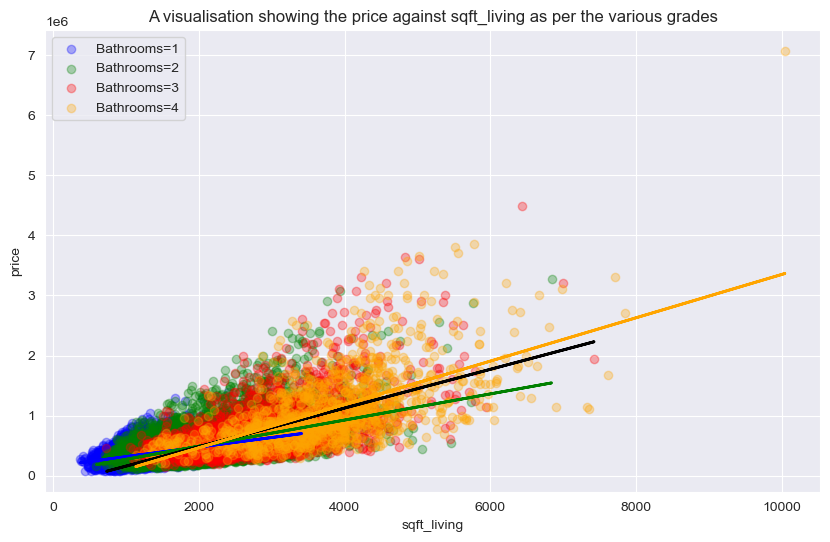

In [783]:
# Plot outputs
plt.figure(figsize=(10,6))
#plotting a scatter plot of the various sqft_living against their prices as per the bathrooms
plt.scatter(bathroom_1_house, bathroom_1['price'],  color='blue', alpha=0.3, label = 'Bathrooms=1')
plt.scatter(bathroom_2_house, bathroom_2['price'],  color='green', alpha=0.3, label = 'Bathrooms=2')
plt.scatter(bathroom_3_house, bathroom_3['price'],  color='red', alpha=0.3, label = 'Bathrooms=3')
plt.scatter(bathroom_4_house, bathroom_4['price'],  color='orange', alpha=0.3, label = 'Bathrooms=4')

##Plotting our linear model line
plt.plot(bathroom_1_house, pred_1, color='blue', linewidth=2)
plt.plot(bathroom_2_house, pred_2, color='green', linewidth=2)
plt.plot(bathroom_3_house, pred_3, color='black', linewidth=2)
plt.plot(bathroom_4_house, pred_4, color='orange', linewidth=2)
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.title('A visualisation showing the price against sqft_living as per the various grades')
plt.legend();

This show that ther is an actual intercation between these variables because the lines intersect,so far I think we can say that this is by far the best interaction between the variables provided., lets go ahead and see the performance of this interaction.
We shall use one of the encoded variables since this is a categorical variable.

In [797]:
x_interact=x.copy()
linreg=LinearRegression()
##Performing an interaction between grade and sqft_living
##An interaction is performed by multiplying the variables forming the interaction.
x_interact['sqft_living_grade']=x['sqft_living']*x['bathrooms_8']
linreg.fit(x_interact,y)

LinearRegression()

In [798]:
r2_score(y,linreg.predict(x_interact))

0.6532189029741358

We can see that our R2 increases from 0.483 to 0.653 .<br> We can also see that the number of bathrooms in ahouse does play a role key when selling the house,this is because as the number of bathrooms and sqft_living increase, so does the price, below is a grapgh showing my findings.

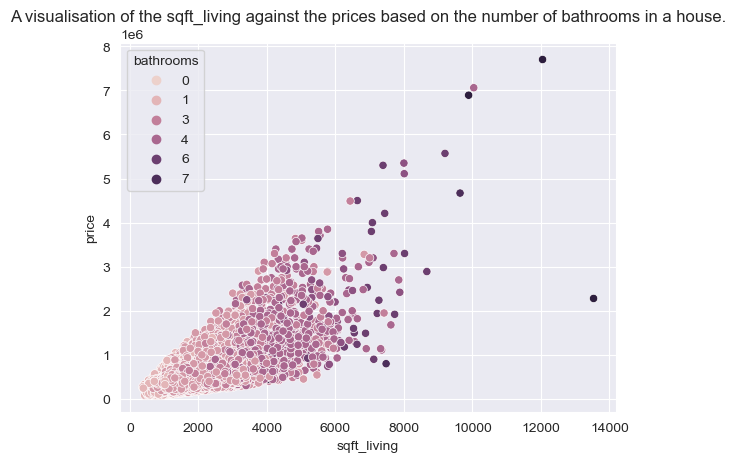

In [786]:
sns.scatterplot(data=df,x='sqft_living',y='price',hue='bathrooms')
plt.title('A visualisation of the sqft_living against the prices based on the number of bathrooms in a house.')
plt.show();

You can see that houses with a high number of bathrooms and sqft_lving have high prices and those with a low number of bathrooms and sqft_livng have low prices.

From the above, we can see that interacts really improve the performance of our model and boosts our R2.The most accurate interact would be between bathrooms and sqft_living since you can see that there is an intersection between the linear models when you plot the visualisation.

### 2) Multiple Linear Regression.

Lets create a multiple linear reltionship between  our target variable(**Price**) and all our indipendent variables.

In [604]:
##Set out come as price and the predictors as all other variables in our model except price
##fit predictors and outcome into our model
predictors=x
outcome='price'
pred_sum='+'.join(predictors.columns)
formula=outcome+'~'+pred_sum
model=ols(formula=formula,data=df_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1563.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:58:30   Log-Likelihood:                -5355.9
No. Observations:               21597   AIC:                         1.077e+04
Df Residuals:                   21570   BIC:                         1.098e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.6305      0.166     76.172      0.000      12.305      12.955
bedrooms          -0.0472      0.003    -16.461      0.000      -0.053      -0.042
sqft_lot          -0.0330      0.002    -13.190      0.000      -0.038      -0.028
sqft_living        0.2103      0.005     46.253      0.000       0.201       0.219
grade              0.2588      0.003     73.960      0.000       0.252       0.266
yr_built          -0.1549      0.003    -53.823      0.000      -0.160      -0.149
waterfront_1       0.3443      0.032     10.923      0.000       0.283       0.406
view_1             0.1743      0.017     10.035      0.000       0.140       0.208
view_2             0.0990      0.011      9.422      0.000       0.078       0.120
view_3             0.1392      0.014      9.721      0.000       0.111       0.167
view_4             0.2732      0.022     12.545      0.000       0.231       0.316
yr_renovated_1     0.0176      0.012      1.441      0.150      -0.006       0.042
floors_2           0.0413      0.005      8.042      0.000       0.031       0.051
floors_3           0.1931      0.014     13.449      0.000       0.165       0.221
floors_4           0.1772      0.117      1.508      0.132      -0.053       0.407
condition_2       -0.0477      0.062     -0.765      0.444      -0.170       0.075
condition_3        0.0721      0.058      1.244      0.213      -0.041       0.186
condition_4        0.0940      0.058      1.622      0.105      -0.020       0.208
condition_5        0.1591      0.058      2.730      0.006       0.045       0.273
bathrooms_1        0.2656      0.155      1.711      0.087      -0.039       0.570
bathrooms_2        0.2718      0.155      1.750      0.080      -0.033       0.576
bathrooms_3        0.3535      0.155      2.274      0.023       0.049       0.658
bathrooms_4        0.4515      0.156      2.900      0.004       0.146       0.757
bathrooms_5        0.6075      0.161      3.774      0.000       0.292       0.923
bathrooms_6        0.6996      0.168      4.160      0.000       0.370       1.029
bathrooms_7        0.0443      0.270      0.164      0.870      -0.484       0.573
bathrooms_8        0.6569      0.220      2.982      0.003       0.225       1.089
==============================================================================
Omnibus:                       92.115   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.044
Skew:                          -0.043   Prob(JB):                     1.16e-27
Kurtosis:                       3.361   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we can see that there is an improvement in our r2 of multiple linear regression compared to that of our simple linear regression, this is because we have increased the number of variables in our model.

##### b) Checking for Normality.

As we had seen earlier , one of the assumptions for linear regression is normality, when then proceed to checking for normality by plotting a Q-Q plot of our model residuals

C:\Users\Hp\AppData\Local\Temp\ipykernel_14920\2677595707.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


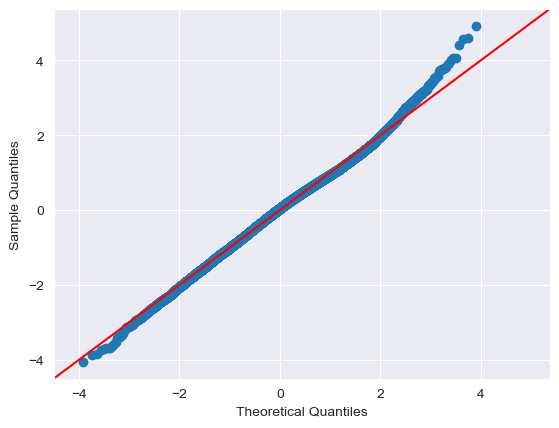

In [605]:
residual=model.resid
fig=sm.graphics.qqplot(residual,dist=stats.norm,line='45',fit=True)
fig.show()

From the above Q-Q plot it is safe to say that our variable check on the normality assumptions, although not perfectly.

#### d)Checking for the homoscedacity assumptions

Here, we shall use a goldfeld-quandt test, this uses the hypothesis analogy, where the **Null hypothesis is :Our data is homoscedastic** while , the **Alternative hypothesis : Our data is not homoscedastic.** We shall then prove homoscedacity or heteroscedacity based on our *P-value*.

In [606]:
gq_test = pd.DataFrame(sms.het_goldfeldquandt(residual, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

gq_test

,value
F statistic,0.955748
p-value,0.990579


From the results of the Goldfeld-quandt test, we can see that our p-value > 0.05 hence we fail to reject the null hypothesis(*Which states that our data is homoscedastic).

### Multiple linear regression with sklearn.LinearRegression 

In the above model , we used stats.model lets go ahead and create a multiple linear regression with sklearn.

In [799]:
## we are using linear regression imported from sklearn.models
linreg=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
linreg.fit(X_train,y_train)

LinearRegression()

In [800]:
#Lets check at our y-intercept 
linreg.intercept_

12.676912467657539

In [801]:
##Lets check at our model coefficients
linreg.coef_

array([-0.04830134, -0.03365342,  0.2107924 ,  0.25791614, -0.15493208,
        0.3467967 ,  0.17203851,  0.09571516,  0.13060634,  0.29528113,
        0.01696187,  0.04487321,  0.19534811,  0.17837829, -0.09537668,
        0.03347452,  0.05952242,  0.11972388,  0.25776217,  0.26015   ,
        0.34942253,  0.43482657,  0.57949461,  0.70123572,  0.02800843,
        0.82619132])

In [802]:
#lets check the r2 of this model
r_2=r2_score(y_train,linreg.predict(X_train))
r_2

0.6539145579531607

There is really not much of a difference between the performance of our multiple linear regression.they both lie at around 0.65

### Model validation with train-test-split

There are two ways to peform model validation <br> a)Train-test-split<br> b)cross-validation<br>.
Here , we will use the train-test-split, where we seperate our data into the training data set and the testing dataset,the training dataset is what we feed to our model, so that it can be able to learn the pattern in our dataset and predict our testing dataset , we can then see if their is a problem in our model by checking the R2 score of the training data against that of the testing dataset.

In [409]:
##lets initiate our regression.
linreg4=LinearRegression()
##Now lets split our dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)
linreg4.fit(x_train,y_train)

LinearRegression()

In [410]:
## Lets see the training data's R-squared
r2_train=r2_score(y_train,linreg4.predict(x_train))
r2_train

0.6523443391784028

In [411]:
##Getting the testing data r-squared
r2_test=r2_score(y_test,linreg4.predict(x_test))
r2_test

0.5963022867834031

In [412]:
cross_val_score(linreg4, x_train, y_train)

array([0.62914766, 0.62539948, 0.61413425, 0.64838191, 0.58801886])

According to me, our model seems to be have over trained since you can see that there is quite a difference between the R2 of the train and that of the test ,lets go ahead and see how we can solve that.

### Feature selection 

From the above, we can use feature selection, to select the variables that are most suitable for our model so that we can get a good model.We have seen that our model over trains due to it being given a lot of variables to feed on, one of the ways we can do this is by selecting features that are useful to us.We can easily perform feature selection by using RFE which selects for us the best features

In [415]:
linreg2=LinearRegression()
##Lets select 15 features out of our 25 features
selector=RFE(linreg,n_features_to_select=15)
selctor=selector.fit(x_train,y_train)
support=selector.support_

ranking=selector.ranking_
##Lets create a DataFrame of our features and their RFE Rankings and support
df_new=pd.DataFrame(list(zip(x.columns,support,ranking)))
df_new

,0,1,2
0,bedrooms,False,5
1,sqft_lot,False,10
2,sqft_living,True,1
3,grade,True,1
4,yr_built,True,1
5,waterfront_1,True,1
6,view_1,True,1
7,view_2,False,2
8,view_3,True,1
9,view_4,True,1


We have selected our features,lets try and get a list of our selected features.

In [416]:
##Here we are trying to get a lsi of the Features where the ranking is 1 
##This means that we are trying to get a list of the features that our RFE finds to be important.
selected_features=df_new.loc[df_new[2]==1]
selected_features=list(selected_features[0])
selected_features

['sqft_living',
 'grade',
 'yr_built',
 'waterfront_1',
 'view_1',
 'view_3',
 'view_4',
 'floors_3',
 'floors_4',
 'bathrooms_3',
 'bathrooms_4',
 'bathrooms_5',
 'bathrooms_6',
 'bathrooms_7',
 'bathrooms_8']

Lets get a dataframe of our final selected features.

In [417]:
##Here , we are getting our final dataframe with the selected features.
df_fin_features=df_fin[selected_features]
df_fin_features


,sqft_living,grade,yr_built,waterfront_1,view_1,view_3,view_4,floors_3,floors_4,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8
0,-1.125582,-0.525943,-0.537421,0,0,0,0,0,0,0,0,0,0,0,0
1,0.709463,-0.525943,-0.674341,0,0,0,0,0,0,0,0,0,0,0,0
2,-2.131943,-1.558145,-1.293975,0,0,0,0,0,0,0,0,0,0,0,0
3,0.070676,-0.525943,-0.196343,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.292732,0.368190,0.547959,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.513218,0.368190,1.284066,0,0,0,0,1,0,0,0,0,0,0,0
21593,0.458017,0.368190,1.450238,0,0,0,0,0,0,0,0,0,0,0,0
21594,-1.469095,-0.525943,1.284066,0,0,0,0,0,0,0,0,0,0,0,0
21595,-0.407754,0.368190,1.117479,0,0,0,0,0,0,0,0,0,0,0,0


Lets go ahead and create a model with the features that have been selected by our RFE and see if our R-squared improves.

In [418]:
linreg6=LinearRegression()
X = df_fin[selected_features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

linreg6.fit(X_train,y_train)

LinearRegression()

In [419]:
##We are getting the r2_train of the selected features
r2_train=r2_score(y_train,linreg6.predict(X_train))
r2_train

0.6277786593656134

In [420]:
##We are getting the r2_test of the selected features.
r2_test=r2_score(y_test,linreg6.predict(X_test))
r2_test

0.622243256725343

We can see that there is really not much of a big difference between the r2 of the train and test, hence we can say that our model is okay, we are not overfitting nor underfitting the model, this model can now be used to predict our features.

### Lets use our model to predict the price of a house 

Lets create a DataFrame of the features that we want to predict.

In [474]:
to_predict=pd.DataFrame({
    

 'bathrooms': [4,3,1,7,8,0,6],
 'sqft_living': [8000,9000,5000,10030,15000,20000,15000],
 'grade': [10,12,8,4,6,6,5],
 'yr_built': [1996,1950,2000,1980,1970,1960,1940],
 'waterfront': [1,0,1,0,1,1,1],
 'view' : [0,4,3,3,1,4,1],
 'floors': [3,3,4,0,3,0,3],
    

})
to_predict

,bathrooms,sqft_living,grade,yr_built,waterfront,view,floors
0,4,8000,10,1996,1,0,3
1,3,9000,12,1950,0,4,3
2,1,5000,8,2000,1,3,4
3,7,10030,4,1980,0,3,0
4,8,15000,6,1970,1,1,3
5,0,20000,6,1960,1,4,0
6,6,15000,5,1940,1,1,3


Now that we have our data, lets go ahead and transform our data.we shall perform log transformation and scaling.

In [475]:
#lets perform log transformation.
to_transform=['sqft_living','grade','yr_built']
log_transformed=pd.DataFrame([])
for col in to_transform:
    log_transformed[col]=np.log(to_predict[col])
log_transformed.astype(float)
log_transformed
log_transformed

,sqft_living,grade,yr_built
0,8.987197,2.302585,7.598900
1,9.104980,2.484907,7.575585
2,8.517193,2.079442,7.600902
3,9.213336,1.386294,7.590852
4,9.615805,1.791759,7.585789
5,9.903488,1.791759,7.580700
6,9.615805,1.609438,7.570443


lets do scaling

In [476]:
scale_df_fin=pd.DataFrame([])
columns=log_transformed.columns
cols=log_transformed[columns]
for column in cols:
    col2=to_predict[column]
    scale_df_fin[column]=(col2-np.mean(col2))/(np.sqrt(np.var(col2)))
scale_df_fin

,sqft_living,grade,yr_built
0,-0.779437,1.021446,1.200422
1,-0.569831,1.774091,-0.995804
2,-1.408257,0.268802,1.391398
3,-0.353936,-1.236488,0.436517
4,0.687809,-0.483843,-0.040923
5,1.735842,-0.483843,-0.518364
6,0.687809,-0.860165,-1.473245


Since we have categorical data, lets go ahead and encode our categorical values.

In [477]:
waterfront_dummy=pd.get_dummies(to_predict['waterfront'],prefix='waterfront',drop_first=True)
view_dummy=pd.get_dummies(to_predict['view'],prefix='view',drop_first=True)
floors_dummy=pd.get_dummies(to_predict['floors'],prefix='floors',drop_first=True)
bathrooms_dummy=pd.get_dummies(to_predict['bathrooms'],prefix='bathrooms',drop_first=True)

dummy_df=pd.concat([waterfront_dummy,view_dummy,floors_dummy,bathrooms_dummy],axis=1)
dummy_df

,waterfront_1,view_1,view_3,view_4,floors_3,floors_4,bathrooms_1,bathrooms_3,bathrooms_4,bathrooms_6,bathrooms_7,bathrooms_8
0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,1,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,0,0,1
5,1,0,0,1,0,0,0,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0,1,0,0


Now that we have preprocessed our data, lets go ahead and combine them to form our cleaned Dataframe.

In [478]:
to_be_predicted_final=pd.concat([scale_df_fin,dummy_df],axis=1)
to_be_predicted_final

,sqft_living,grade,yr_built,waterfront_1,view_1,view_3,view_4,floors_3,floors_4,bathrooms_1,bathrooms_3,bathrooms_4,bathrooms_6,bathrooms_7,bathrooms_8
0,-0.779437,1.021446,1.200422,1,0,0,0,1,0,0,0,1,0,0,0
1,-0.569831,1.774091,-0.995804,0,0,0,1,1,0,0,1,0,0,0,0
2,-1.408257,0.268802,1.391398,1,0,1,0,0,1,1,0,0,0,0,0
3,-0.353936,-1.236488,0.436517,0,0,1,0,0,0,0,0,0,0,1,0
4,0.687809,-0.483843,-0.040923,1,1,0,0,1,0,0,0,0,0,0,1
5,1.735842,-0.483843,-0.518364,1,0,0,1,0,0,0,0,0,0,0,0
6,0.687809,-0.860165,-1.473245,1,1,0,0,1,0,0,0,0,1,0,0


Lets use our final dataframe to predict our data.

In [479]:
y_predicted=linreg6.predict(to_be_predicted_final)
y_predicted

C:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bathrooms_1
Feature names seen at fit time, yet now missing:
- bathrooms_5

  warnings.warn(message, FutureWarning)


array([1875411.36109018, 1532476.27339582, 1336026.99151834,
       1316044.93735197, 4976256.16443628, 1530019.05949226,
       2760480.81435921])

From the predicted data, we can get a range of the amount of money a house should be sold at based on these features.

In [480]:
max(y_predicted)

4976256.164436283

In [481]:
min(y_predicted)

1316044.9373519695

From our above prediction, we can say that the sale of a house with our best features,could range from **1,316,044.93** to **$4,976,256.16**

# conclusion

From the above analysis, we can conclude that:<br>
1)There is a high correlation between sqft_living and the target price.<br>
2)There is a linear relationship between sqft_living and price.<br>
3)The price of a house increase as the sqft_living and grade increase.<br>
4)The price of a house increase as the sqft_living and the number of bedrooms increase.<br>
5)Renovation does not have much of an effect on the house price.It should be notted that maybe this is because some of this houses were newly built hence more research is needed on this.<br>
6)The best features to be considered when selling a house include:<br>
                 a)sqft_living<br>
                 b)yr_built<br>
                 c)waterfront<br>
                 d)views<br>
                 e)grade<br>
                 f)floors<br>
                 g)yr_built<br>
                 h)floors<br>
                 i)bathrooms<br>
7)The range of sale price for houses with these features is between $1,316,044.93  to $4,976,256.16

# Recommedations.

1)I would recommend that more focus on the sale of houses with a good sqft_living as this has quite much of an impact on the house price.<br>
2)I would recommend that the company or agent should look into the following features and seek to satisfy them for a good sale:
a)sqft_living<br>
                 b)yr_built<br>
                 c)waterfront<br>
                 d)views<br>
                 e)grade<br>
                 f)floors<br>
                 g)yr_built<br>
                 h)floors<br>
                 i)bathrooms<br>
3)I would recommend that more research be done on the renovated houses and their sale price.
4)I would recommend that a sales agent should target at selling a house at a price range between 1,316,044.93 𝑡𝑜 4,976,256.16 .